In [2]:
! pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [4]:
TimesHigher = pd.read_csv("data/TIMES_WorldUniversityRankings_2024.csv")
shanghaiRanking = pd.read_csv("data/shanghai_ranking_2024.csv")
df = pd.read_csv("data/univercity_ranking_2014_2024_CWUR.csv") # to store all data
WordRankUniversity = df[df['Year'] == 2024].reset_index()  # Filter by 2024 


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

#### TimesHigher


- stats_number_students: The total number of students enrolled at the university.
- stats_student_staff_ratio: The ratio of students to academic staff, reflecting teaching capacity.
- stats_pc_intl_students: The percentage of international students enrolled, showing global

In [5]:
TimesHigher.head()


,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,disabled,website_url
0,1,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,5,...,"21,750",10.9,42%,49 : 51,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,False,https://www.timeshighereducation.com/student/r...
1,2,Stanford University,98.0,20,99.0,1,97.8,8,99.6,2,...,"14,517",6.4,23%,47 : 53,Stanford University,"Computer Science,Communication & Media Studies...",False,False,False,NaN
2,3,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,1,...,"11,085",8.0,33%,41 : 59,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",False,False,False,https://www.timeshighereducation.com/student/r...
3,4,Harvard University,97.8,40,97.7,3,99.9,3,99.4,3,...,"20,050",9.0,25%,51 : 49,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,False,https://www.timeshighereducation.com/student/r...
4,5,University of Cambridge,97.5,50,95.8,7,100.0,1,98.0,12,...,"20,565",11.5,38%,48 : 52,University of Cambridge,Politics & International Studies (incl Develop...,False,False,False,https://www.timeshighereducation.com/student/r...


In [6]:
TimesHigher.columns

Index(['rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'url', 'nid', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'closed', 'unaccredited', 'disabled',
       'website_url'],
      dtype='object')

In [7]:
TimesHigher.shape

(2673, 29)

#### shanghaiRanking

- The global rank of the university


- University_Name
The name of the university or higher education institution being ranked.


- National/Regional Rank
The rank of the university within its respective country or region.


- Alumni
The score related to the number of alumni who have won Nobel Prizes or Fields Medals.


- Award
The score reflecting the number of staff at the university who have won Nobel Prizes in specified fields or Fields Medals.


- Hici
The score based on the number of Highly Cited Researchers affiliated with the university,


- N&S
The score representing the number of research articles published in Nature and Science between 2019 and 2023.


- PUB
The score indicating the number of papers published by the university in the Science Citation Index-Expanded™ (SCIE) and Social Science Citation Index™ (SSCI) during 2023.


- PCP
The Per Capita Performance score, calculated by dividing the weighted scores of the five indicators

In [8]:

shanghaiRanking.head()


,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5


In [9]:
shanghaiRanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1000 non-null   object 
 1   University_Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Alumni                  1000 non-null   float64
 4   Award                   1000 non-null   float64
 5   Hici                    1000 non-null   float64
 6   N&S                     989 non-null    float64
 7   PUB                     1000 non-null   float64
 8   PCP                     1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [10]:
shanghaiRanking.shape

(1000, 9)

#### WordRankUniversity


In [11]:
del WordRankUniversity['index']
WordRankUniversity.head()

,World Rank,Institution,Location,Year,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,2024,1.0,1.0,1.0,1.0,1.0,100.0
1,2,Massachusetts Institute of Technology,USA,2024,2.0,4.0,12.0,2.0,12.0,96.8
2,3,Stanford University,USA,2024,3.0,10.0,4.0,3.0,2.0,95.2
3,4,University of Cambridge,United Kingdom,2024,1.0,3.0,26.0,4.0,14.0,94.1
4,5,University of Oxford,United Kingdom,2024,2.0,7.0,28.0,9.0,6.0,93.3


In [12]:
WordRankUniversity.shape

(1000, 10)

In [13]:
WordRankUniversity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          1000 non-null   int64  
 1   Institution         1000 non-null   object 
 2   Location            1000 non-null   object 
 3   Year                1000 non-null   int64  
 4   National Rank       1000 non-null   float64
 5   Education Rank      1000 non-null   float64
 6   Employability Rank  1000 non-null   float64
 7   Faculty Rank        1000 non-null   float64
 8   Research Rank       1000 non-null   float64
 9   Score               1000 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 78.2+ KB


#### We have 2000 Record and 9 columns:
- World Rank : This represents the overall rank of the university globally.
- University Names: The name of the university.
- Location: The country where the university is located.
- Educational Rank : A specific ranking based on the quality of education.
- Employability Rank: Measures how well the university prepares its graduates for employment. (مقياس مدى قابلية توظيف الخريجين)
- Faculty Rank: Reflects the quality and qualifications of the university's faculty members.(تصنيف مستوى واداء هيئة التدريس)
- Research Rank: Indicates the university’s performance in research activities.
- National Rank: The university's rank within its own country.
- Score: The overall score representing the university's performance across various criteria.

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

#### 1-TimesHigher DataSet

In [14]:
TimesHigher.head(3)


,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,disabled,website_url
0,1,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,5,...,"21,750",10.9,42%,49 : 51,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,False,https://www.timeshighereducation.com/student/r...
1,2,Stanford University,98.0,20,99.0,1,97.8,8,99.6,2,...,"14,517",6.4,23%,47 : 53,Stanford University,"Computer Science,Communication & Media Studies...",False,False,False,NaN
2,3,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,1,...,"11,085",8.0,33%,41 : 59,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",False,False,False,https://www.timeshighereducation.com/student/r...


In [15]:
TimesHigher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank                               2673 non-null   object 
 1   name                               2673 non-null   object 
 2   scores_overall                     1904 non-null   object 
 3   scores_overall_rank                2673 non-null   int64  
 4   scores_teaching                    1904 non-null   float64
 5   scores_teaching_rank               2673 non-null   int64  
 6   scores_research                    1904 non-null   float64
 7   scores_research_rank               2673 non-null   int64  
 8   scores_citations                   1904 non-null   float64
 9   scores_citations_rank              2673 non-null   int64  
 10  scores_industry_income             1904 non-null   float64
 11  scores_industry_income_rank        2673 non-null   int64

In [16]:
TimesHigher.describe(include='object')

,rank,name,scores_overall,record_type,url,location,stats_number_students,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,website_url
count,2673,2673,1904,2673,2673,2673,2673,2673,2580,2673,2669,344
unique,160,2673,159,3,2673,127,2574,85,91,2673,2567,344
top,Reporter,University of Oxford,9.7–22.7,master_account,/world-university-rankings/university-oxford,United States,"1,992",0%,55 : 45,University of Oxford,"Medicine & Dentistry,Other Health",https://www.timeshighereducation.com/student/r...
freq,769,1,395,2509,1,175,3,484,120,1,32,1


In [17]:
TimesHigher.describe(include='number')

,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,member_level,nid,stats_student_staff_ratio
count,2.673000e+03,1904.000000,2673.000000,1904.000000,2673.000000,1904.000000,2673.000000,1904.000000,2673.000000,1904.000000,2673.000000,2673.000000,2673.000000,2673.000000
mean,2.945872e+05,29.060662,678.473625,23.416176,678.473625,52.189706,678.473625,47.057405,678.473625,49.907143,678.473625,0.550318,437757.592593,19.130527
std,4.486570e+05,13.967201,633.450078,16.697923,633.450078,25.071342,633.450078,26.150454,633.450078,21.828249,633.450078,2.231166,292321.295190,13.450010
min,1.000000e+01,9.400000,0.000000,4.600000,0.000000,3.400000,0.000000,15.600000,0.000000,16.100000,0.000000,0.000000,466.000000,0.300000
25%,6.690000e+03,19.400000,0.000000,11.800000,0.000000,30.400000,0.000000,22.275000,0.000000,31.975000,0.000000,0.000000,131435.000000,12.300000
50%,1.337000e+04,25.800000,568.000000,17.250000,568.000000,52.400000,568.000000,41.050000,568.000000,45.300000,568.000000,0.000000,622251.000000,16.600000
75%,1.000101e+06,34.500000,1236.000000,29.900000,1236.000000,73.225000,1236.000000,68.200000,1236.000000,65.400000,1236.000000,0.000000,675423.000000,22.500000
max,1.000769e+06,99.000000,1904.000000,100.000000,1904.000000,99.700000,1904.000000,100.000000,1904.000000,98.800000,1904.000000,11.000000,726248.000000,333.300000


#### 2-shanghaiRanking Dataset

In [18]:
shanghaiRanking.head(3)

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6


In [19]:
shanghaiRanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1000 non-null   object 
 1   University_Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Alumni                  1000 non-null   float64
 4   Award                   1000 non-null   float64
 5   Hici                    1000 non-null   float64
 6   N&S                     989 non-null    float64
 7   PUB                     1000 non-null   float64
 8   PCP                     1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [20]:
shanghaiRanking.describe(include='object')

,Rank,University_Name,National/Regional Rank
count,1000,1000,1000
unique,87,1000,130
top,901-1000,Harvard University,1
freq,100,1,60


In [21]:
shanghaiRanking.describe(include='number')

,Alumni,Award,Hici,N&S,PUB,PCP
count,1000.000000,1000.00000,1000.000000,989.000000,1000.000000,1000.000000
mean,4.509600,3.78120,10.734400,10.575126,35.113000,19.655300
std,10.103201,11.45538,10.949265,10.637247,13.684495,8.800436
min,0.000000,0.00000,0.000000,0.000000,9.300000,8.600000
25%,0.000000,0.00000,0.000000,3.900000,25.775000,14.100000
50%,0.000000,0.00000,9.200000,7.300000,31.700000,17.600000
75%,0.000000,0.00000,14.600000,13.300000,41.425000,23.000000
max,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000


#### 3-WordRankUniversity dataset

In [22]:
WordRankUniversity.head(3)

,World Rank,Institution,Location,Year,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,2024,1.0,1.0,1.0,1.0,1.0,100.0
1,2,Massachusetts Institute of Technology,USA,2024,2.0,4.0,12.0,2.0,12.0,96.8
2,3,Stanford University,USA,2024,3.0,10.0,4.0,3.0,2.0,95.2


In [23]:
WordRankUniversity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          1000 non-null   int64  
 1   Institution         1000 non-null   object 
 2   Location            1000 non-null   object 
 3   Year                1000 non-null   int64  
 4   National Rank       1000 non-null   float64
 5   Education Rank      1000 non-null   float64
 6   Employability Rank  1000 non-null   float64
 7   Faculty Rank        1000 non-null   float64
 8   Research Rank       1000 non-null   float64
 9   Score               1000 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 78.2+ KB


In [24]:
WordRankUniversity.describe(include='object')


,Institution,Location
count,1000,1000
unique,1000,63
top,Harvard University,USA
freq,1,209


In [25]:
WordRankUniversity.describe(include='number')

,World Rank,Year,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
count,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2024.0,44.586000,447.949000,724.501000,245.608000,501.440000,75.601500
std,288.819436,0.0,52.659602,168.804287,349.520836,77.059357,290.392862,4.536597
min,1.000000,2024.0,1.000000,1.000000,1.000000,1.000000,1.000000,70.500000
25%,250.750000,2024.0,6.000000,385.750000,430.750000,277.250000,250.750000,72.200000
50%,500.500000,2024.0,22.000000,551.000000,1001.000000,284.000000,500.500000,74.350000
75%,750.250000,2024.0,61.250000,551.000000,1001.000000,284.000000,750.250000,77.800000
max,1000.000000,2024.0,209.000000,551.000000,1001.000000,284.000000,1001.000000,100.000000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [26]:
# in the kaggle page mentioned data source

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [27]:
# data is exist for 2024 Ranking which is up to date

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [28]:
# It is Consistency

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [29]:
# From WordRankUniversity We will delete Year column 
WordRankUniversity.columns

Index(['World Rank', 'Institution', 'Location', 'Year', 'National Rank',
       'Education Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank',
       'Score'],
      dtype='object')

In [30]:
del WordRankUniversity['Year']

In [31]:
TimesHigher.columns

Index(['rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'url', 'nid', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'closed', 'unaccredited', 'disabled',
       'website_url'],
      dtype='object')

In [32]:
# From TimesHigher we will delete website_url because has  to much null values  +2000
del TimesHigher['website_url']


In [33]:
# From TimesHigher we will delete closed because has  one value (False)
TimesHigher['closed'].unique()

array([False])

In [34]:
del TimesHigher['closed']


In [35]:
TimesHigher.columns

Index(['rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'url', 'nid', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'unaccredited', 'disabled'],
      dtype='object')

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


#### shanghaiRanking

In [36]:
shanghaiRanking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1000 non-null   object 
 1   University_Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Alumni                  1000 non-null   float64
 4   Award                   1000 non-null   float64
 5   Hici                    1000 non-null   float64
 6   N&S                     989 non-null    float64
 7   PUB                     1000 non-null   float64
 8   PCP                     1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [37]:
# Check if there is a duplicated rows 
shanghaiRanking.duplicated().sum()

0

In [38]:
shanghaiRanking['University_Name'].duplicated().sum()

0

In [39]:
shanghaiRanking['Rank'].duplicated().sum()

913

In [40]:
# View all duplicated values and number of duplicates
shanghaiRanking[shanghaiRanking['Rank'].duplicated(keep=False)]['Rank'].value_counts()



901-1000    100
801-900     100
701-800     100
601-700     100
501-600     100
401-500     100
301-400     100
201-300     100
151-200      50
101-150      50
90            4
82            3
69            3
55            3
47            3
74            2
12            2
86            2
72            2
95            2
58            2
50            2
45            2
43            2
33            2
18            2
8             2
Name: Rank, dtype: int64

In [41]:
count_result = (shanghaiRanking == '-').sum()
count_result

Rank                      0
University_Name           0
National/Regional Rank    0
Alumni                    0
Award                     0
Hici                      0
N&S                       0
PUB                       0
PCP                       0
dtype: int64

#### WordRankUniversity

In [42]:
WordRankUniversity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          1000 non-null   int64  
 1   Institution         1000 non-null   object 
 2   Location            1000 non-null   object 
 3   National Rank       1000 non-null   float64
 4   Education Rank      1000 non-null   float64
 5   Employability Rank  1000 non-null   float64
 6   Faculty Rank        1000 non-null   float64
 7   Research Rank       1000 non-null   float64
 8   Score               1000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 70.4+ KB


In [43]:
# Check if there is a duplicated rows 
WordRankUniversity.duplicated().sum()

0

In [44]:
# Check if there is a duplicated University Names
WordRankUniversity['Institution'].duplicated().sum()

0

In [45]:
# Check if there is a duplicated Ranking 
WordRankUniversity['World Rank'].duplicated().sum()


0

In [46]:
# Check if there is a duplicated Ranking National using Location and National Rank
WordRankUniversity[['Location','National Rank']].duplicated().sum()


0

In [47]:
# See what is the duplicated values
WordRankUniversity[WordRankUniversity['Employability Rank'].duplicated(keep=False)]['Employability Rank'].value_counts()


1001.0    511
Name: Employability Rank, dtype: int64

In [48]:
WordRankUniversity[WordRankUniversity['Faculty Rank'].duplicated(keep=False)]['Employability Rank'].value_counts()


1001.0    442
18.0        1
443.0       1
494.0       1
150.0       1
         ... 
505.0       1
374.0       1
230.0       1
919.0       1
923.0       1
Name: Employability Rank, Length: 319, dtype: int64

In [49]:
WordRankUniversity[WordRankUniversity['Education Rank'].duplicated(keep=False)]['Employability Rank'].value_counts()


1001.0    413
806.0       1
652.0       1
82.0        1
155.0       1
         ... 
696.0       1
938.0       1
578.0       1
609.0       1
30.0        1
Name: Employability Rank, Length: 221, dtype: int64

In [50]:
# View the count if - value is found in any column 
count_result = (WordRankUniversity == '-').sum()
count_result

World Rank            0
Institution           0
Location              0
National Rank         0
Education Rank        0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [51]:

WordRankUniversity['Research Rank'].duplicated(keep=False).sum()


40

In [52]:
WordRankUniversity['Faculty Rank'].duplicated(keep=False).sum()

760

#### TimesHigher

In [53]:
TimesHigher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank                               2673 non-null   object 
 1   name                               2673 non-null   object 
 2   scores_overall                     1904 non-null   object 
 3   scores_overall_rank                2673 non-null   int64  
 4   scores_teaching                    1904 non-null   float64
 5   scores_teaching_rank               2673 non-null   int64  
 6   scores_research                    1904 non-null   float64
 7   scores_research_rank               2673 non-null   int64  
 8   scores_citations                   1904 non-null   float64
 9   scores_citations_rank              2673 non-null   int64  
 10  scores_industry_income             1904 non-null   float64
 11  scores_industry_income_rank        2673 non-null   int64

In [54]:
# Check if there is a duplicated rows 
TimesHigher.duplicated().sum()

0

In [55]:
# Check if there is a duplicated University Name
TimesHigher['name'].duplicated().sum()

0

In [56]:
# Check if there is a duplicated Rank 
TimesHigher['rank'].duplicated().sum()


2513

In [57]:
TimesHigher[TimesHigher['rank'].duplicated(keep=False)]['rank'].value_counts()


Reporter     769
1501+        395
1201–1500    307
1001–1200    201
601–800      199
801–1000     198
501–600      102
401–500      102
251–300       52
351–400       50
201–250       49
301–350       48
=168           6
=193           5
=140           3
=199           3
=177           3
=161           3
=152           3
=155           3
=64            3
=87            3
=106           3
=111           3
=143           2
=145           2
=55            2
=92            2
=95            2
=97            2
=99            2
=103           2
=109           2
=116           2
=119           2
=191           2
=187           2
=185           2
=123           2
=175           2
=130           2
=164           2
=136           2
=158           2
=38            2
=138           2
=150           2
=30            2
Name: rank, dtype: int64

In [58]:
TimesHigher[TimesHigher['rank'] == 'Reporter'].head(10)

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,unaccredited,disabled
1904,Reporter,Abbes Laghrour University of Khenchala,NaN,1000001,NaN,0,NaN,0,NaN,0,...,720223,Algeria,"18,085",26.1,0%,70 : 30,Abbes Laghrour University of Khenchala,"Languages, Literature & Linguistics,Chemical E...",False,False
1905,Reporter,Abbottabad University of Science and Technology,NaN,1000002,NaN,0,NaN,0,NaN,0,...,718734,Pakistan,"4,200",13.3,0%,31 : 69,Abbottabad University of Science and Technology,"Computer Science,Business & Management,Mathema...",False,False
1906,Reporter,Abdelhafid Boussouf University Center of Mila,NaN,1000003,NaN,0,NaN,0,NaN,0,...,720967,Algeria,"11,027",24.9,0%,72 : 28,Abdelhafid Boussouf University Center of Mila,"Geology, Environmental, Earth & Marine Science...",False,False
1907,Reporter,Abdullah Gül University,NaN,1000004,NaN,0,NaN,0,NaN,0,...,587745,Turkey,"2,944",22.5,9%,46 : 54,Abdullah Gül University,"Biological Sciences,Physics & Astronomy,Politi...",False,False
1908,Reporter,Abertay University,NaN,1000005,NaN,0,NaN,0,NaN,0,...,131670,United Kingdom,"4,205",23.4,21%,47 : 53,Abertay University,"Other Health,Business & Management,Art, Perfor...",False,False
1909,Reporter,Abia State University,NaN,1000006,NaN,0,NaN,0,NaN,0,...,720774,Nigeria,"21,502",45.8,0%,49 : 51,Abia State University,"Languages, Literature & Linguistics,Mathematic...",False,False
1910,Reporter,Abrar University,NaN,1000007,NaN,0,NaN,0,NaN,0,...,722722,Somalia,495,5.5,0%,40 : 60,Abrar University,"Agriculture & Forestry,Veterinary Science,Comp...",False,False
1911,Reporter,Ada Kent University,NaN,1000008,NaN,0,NaN,0,NaN,0,...,675465,Northern Cyprus,911,1.0,19%,39 : 61,Ada Kent University,"Other Health,Education,Languages, Literature &...",False,False
1912,Reporter,Adventist University of Central Africa,NaN,1000009,NaN,0,NaN,0,NaN,0,...,722635,Rwanda,"3,174",31.7,11%,44 : 56,Adventist University of Central Africa,"Languages, Literature & Linguistics,Business &...",False,False
1913,Reporter,AECC University College,NaN,1000010,NaN,0,NaN,0,NaN,0,...,720908,United Kingdom,780,19.5,39%,45 : 55,AECC University College,"Sport Science,Psychology,Other Health",False,False


In [59]:
TimesHigher.sort_values('scores_overall').head(2)

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,unaccredited,disabled
1207,1201–1500,Allameh Tabataba ’i University,22.8–28.2,12080,29.1,738,14.2,1184,28.5,1482,...,131542,Iran,"15,113",29.7,3%,57 : 43,Allameh Tabataba ’i University,"Mathematics & Statistics,Law,Business & Manage...",False,False
1299,1201–1500,University of Hormozgan,22.8–28.2,13000,24.6,1035,14.1,1192,37.6,1265,...,725323,Iran,"5,338",24.4,0%,58 : 42,University of Hormozgan,"Agriculture & Forestry,Psychology,Sport Scienc...",False,False


In [60]:
# View the count if - value is found in any column 
count_result2 = (TimesHigher == '-').sum()
count_result2

rank                                 0
name                                 0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
scores_industry_income               0
scores_industry_income_rank          0
scores_international_outlook         0
scores_international_outlook_rank    0
record_type                          0
member_level                         0
url                                  0
nid                                  0
location                             0
stats_number_students                0
stats_student_staff_ratio            0
stats_pc_intl_students               0
stats_female_male_ratio              0
aliases                              0
subjects_offered                     0
unaccredited             

In [61]:
# There is a duplicated 
TimesHigher[TimesHigher['scores_overall'].duplicated(keep=False)]['scores_overall'].describe(include='object')


count         1792
unique          47
top       9.7–22.7
freq           395
Name: scores_overall, dtype: object

In [62]:
TimesHigher['nid'].duplicated().sum()


0

In [63]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [64]:
shanghaiRanking.head()


,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5


#### shanghaiRanking

In [65]:
shanghaiRanking.isnull().sum().sort_values(ascending = False)

N&S                       11
Rank                       0
University_Name            0
National/Regional Rank     0
Alumni                     0
Award                      0
Hici                       0
PUB                        0
PCP                        0
dtype: int64

In [66]:
shanghaiRanking['N&S'].fillna(0,inplace=True)

#### WordRankUniversity

In [67]:
WordRankUniversity.isnull().sum().sort_values(ascending = False)

World Rank            0
Institution           0
Location              0
National Rank         0
Education Rank        0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

#### TimesHigher

In [68]:
TimesHigher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank                               2673 non-null   object 
 1   name                               2673 non-null   object 
 2   scores_overall                     1904 non-null   object 
 3   scores_overall_rank                2673 non-null   int64  
 4   scores_teaching                    1904 non-null   float64
 5   scores_teaching_rank               2673 non-null   int64  
 6   scores_research                    1904 non-null   float64
 7   scores_research_rank               2673 non-null   int64  
 8   scores_citations                   1904 non-null   float64
 9   scores_citations_rank              2673 non-null   int64  
 10  scores_industry_income             1904 non-null   float64
 11  scores_industry_income_rank        2673 non-null   int64

In [69]:
TimesHigher.isnull().sum().sort_values(ascending = False)

scores_overall                       769
scores_teaching                      769
scores_research                      769
scores_citations                     769
scores_industry_income               769
scores_international_outlook         769
stats_female_male_ratio               93
subjects_offered                       4
rank                                   0
nid                                    0
unaccredited                           0
aliases                                0
stats_pc_intl_students                 0
stats_student_staff_ratio              0
stats_number_students                  0
location                               0
scores_international_outlook_rank      0
url                                    0
member_level                           0
record_type                            0
name                                   0
scores_industry_income_rank            0
scores_citations_rank                  0
scores_research_rank                   0
scores_teaching_

In [70]:
TimesHigher.fillna({'scores_research': '0'}, inplace=True)
TimesHigher.fillna({'scores_international_outlook': 0.}, inplace=True)
TimesHigher.fillna({'scores_industry_income 6': 0.}, inplace=True)
TimesHigher.fillna({'scores_citations': 0.}, inplace=True)
TimesHigher.fillna({'scores_teaching': 0.}, inplace=True)
TimesHigher.fillna({'scores_overall': 0.}, inplace=True)
TimesHigher.fillna({'scores_industry_income': 0.}, inplace=True)

In [71]:
TimesHigher.fillna({'subjects_offered': 'Unknown'}, inplace=True)

In [ ]:
# To fill null values in stats_female_male_ratio with mean and median 

def convert_ratio(ratio):
    if isinstance(ratio, str) and ':' in ratio:
        female, male = map(int, ratio.split(':'))
        return female, male  # Return as tuple
    return None, None  # Keep missing values as None

TimesHigher[[ 'male_percentage','female_percentage']] = TimesHigher['stats_female_male_ratio'].apply(lambda x: pd.Series(convert_ratio(x)))
mean_female = int(TimesHigher['female_percentage'].mean())
median_male = int(TimesHigher['male_percentage'].median())

TimesHigher['female_percentage'].fillna(mean_female, inplace=True)
TimesHigher['male_percentage'].fillna(median_male, inplace=True)

TimesHigher['stats_female_male_ratio'] = TimesHigher.apply(lambda row: f"{int(row['female_percentage'])}:{int(row['male_percentage'])}", axis=1)




In [73]:
TimesHigher.head()

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,unaccredited,disabled,female_percentage,male_percentage
0,1,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,5,...,"21,750",10.9,42%,49:51,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,49.0,51.0
1,2,Stanford University,98.0,20,99.0,1,97.8,8,99.6,2,...,"14,517",6.4,23%,47:53,Stanford University,"Computer Science,Communication & Media Studies...",False,False,47.0,53.0
2,3,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,1,...,"11,085",8.0,33%,41:59,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",False,False,41.0,59.0
3,4,Harvard University,97.8,40,97.7,3,99.9,3,99.4,3,...,"20,050",9.0,25%,51:49,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,51.0,49.0
4,5,University of Cambridge,97.5,50,95.8,7,100.0,1,98.0,12,...,"20,565",11.5,38%,48:52,University of Cambridge,Politics & International Studies (incl Develop...,False,False,48.0,52.0


In [74]:
# go to clean them 

In [75]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

##### shanghaiRanking

In [76]:
# check columns types 
shanghaiRanking.dtypes

Rank                       object
University_Name            object
National/Regional Rank     object
Alumni                    float64
Award                     float64
Hici                      float64
N&S                       float64
PUB                       float64
PCP                       float64
dtype: object

In [77]:
shanghaiRanking['Rank'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '14',
       '15', '16', '17', '18', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '33', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '45', '47', '50', '52', '53', '54',
       '55', '58', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '72', '74', '76', '77', '78', '79', '80', '81', '82', '85',
       '86', '88', '89', '90', '94', '95', '97', '98', '99', '100',
       '101-150', '151-200', '201-300', '301-400', '401-500', '501-600',
       '601-700', '701-800', '801-900', '901-1000'], dtype=object)

##### WordRankUniversity

In [78]:
# check columns types 
WordRankUniversity.dtypes

World Rank              int64
Institution            object
Location               object
National Rank         float64
Education Rank        float64
Employability Rank    float64
Faculty Rank          float64
Research Rank         float64
Score                 float64
dtype: object

##### TimesHigher

In [79]:
# check columns types 
TimesHigher.dtypes

rank                                  object
name                                  object
scores_overall                        object
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_research                       object
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
scores_industry_income               float64
scores_industry_income_rank            int64
scores_international_outlook         float64
scores_international_outlook_rank      int64
record_type                           object
member_level                           int64
url                                   object
nid                                    int64
location                              object
stats_number_students                 object
stats_student_staff_ratio            float64
stats_pc_intl_students                object
stats_fema

In [80]:
TimesHigher['stats_pc_intl_students'].unique()

array(['42%', '23%', '33%', '25%', '38%', '61%', '22%', '21%', '43%',
       '10%', '36%', '14%', '28%', '35%', '15%', '24%', '27%', '16%',
       '44%', '18%', '46%', '39%', '64%', '19%', '29%', '47%', '53%',
       '34%', '9%', '72%', '20%', '30%', '45%', '8%', '11%', '5%', '51%',
       '13%', '48%', '17%', '31%', '67%', '40%', '26%', '37%', '32%',
       '12%', '6%', '57%', '7%', '4%', '41%', '60%', '1%', '49%', '2%',
       '3%', '92%', '55%', '83%', '0%', '50%', '54%', '74%', '75%', '86%',
       '52%', '82%', '59%', '97%', '63%', '73%', '%', '90%', '96%', '69%',
       '70%', '-0%', '56%', '91%', '88%', '100%', '80%', '58%', '85%'],
      dtype=object)

In [81]:
TimesHigher['stats_female_male_ratio'].unique()

array(['49:51', '47:53', '41:59', '51:49', '48:52', '37:63', '42:58',
       '52:48', '33:67', '51:47', '56:44', '54:46', '59:41', '44:56',
       '58:42', '61:39', '30:70', '45:55', '55:45', '34:66', '63:37',
       '62:38', '31:69', '70:30', '25:75', '50:50', '60:40', '53:47',
       '21:79', '57:43', '65:35', '66:34', '67:33', '32:68', '28:72',
       '35:65', '29:71', '64:36', '46:54', '16:84', '39:61', '27:73',
       '8:92', '43:57', '40:60', '77:23', '69:31', '38:62', '71:29',
       '68:32', '26:74', '36:64', '74:26', '76:24', '24:76', '80:20',
       '5:95', '73:27', '87:13', '11:89', '17:83', '100:0', '84:16',
       '18:82', '22:78', '20:80', '72:28', '6:94', '13:87', '9:91',
       '99:1', '89:11', '12:88', '14:86', '0:100', '15:85', '1:99',
       '75:25', '23:77', '81:19', '82:18', '96:4', '78:22', '10:90',
       '79:21', '91:9', '93:7', '92:8', '83:17', '85:15', '3:97', '19:81'],
      dtype=object)

In [82]:
# Convert it to int 
TimesHigher['stats_number_students'] = TimesHigher['stats_number_students'].map(lambda x: int(x.replace(',','')))


In [83]:
TimesHigher['scores_research'] = TimesHigher['scores_research'].astype('float')

In [84]:
# go to clean them 

In [85]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [86]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [87]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [88]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


##### shanghaiRanking

In [89]:
shanghaiRanking['Rank'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '14',
       '15', '16', '17', '18', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '33', '35', '36', '37', '38',
       '39', '40', '41', '42', '43', '45', '47', '50', '52', '53', '54',
       '55', '58', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '72', '74', '76', '77', '78', '79', '80', '81', '82', '85',
       '86', '88', '89', '90', '94', '95', '97', '98', '99', '100',
       '101-150', '151-200', '201-300', '301-400', '401-500', '501-600',
       '601-700', '701-800', '801-900', '901-1000'], dtype=object)

In [90]:
# We will add new column for range  
def clean_rank_sh(x):
    if x.isdigit():
        return int(x)
    return int(x.split('-')[0].strip())

clean_rank_range = lambda x: int(x.split('-')[1].strip()) if '-' in x else int(x)

In [91]:
shanghaiRanking['rank_end_range']= shanghaiRanking['Rank'].apply(clean_rank_range)
shanghaiRanking['Rank'] = shanghaiRanking['Rank'].apply(clean_rank_sh)

In [92]:
shanghaiRanking['National/Regional Rank'].unique()

array(['1', '2', '3', '4', '5', '6-7', '8', '9', '10', '11', '12', '13',
       '14-15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '6', '7', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '14-22', '39-50', '2-3', '9-12',
       '4-5', '3-6', '3-5', '5-7', '23-33', '7-9', '6-11', '51-59', '6-8',
       '13-20', '12-22', '34-51', '9-15', '4-8', '5-9', '60-78', '1-2',
       '21-25', '9-11', '12-16', '3-8', '79-98', '13-16', '7-8', '16-21',
       '26-31', '52-74', '23-29', '13-18', '99-114', '11-12', '75-91',
       '2-4', '2-5', '3-4', '22-24', '5-6', '30-35', '32-35', '9-10',
       '17-18', '92-114', '11-16', '36-39', '19-21', '19-20', '13-15',
       '115-142', '16-18', '17-20', '115-137', '26-28', '143-155', '1-3',
       '22-27', '40-42', '21-22', '43-51', '138-156', '8-10', '4-6',
       '28-31', '156-167', '19-22', '21-26', '7-11', '43-47', '52-58',
       '23-25', '27-30', '23-26', '48', '32-40', '157-179', '8-11',
 

In [93]:
shanghaiRanking['Regional_rank_end_range']= shanghaiRanking['National/Regional Rank'].apply(clean_rank_range)
shanghaiRanking['National/Regional Rank'] = shanghaiRanking['National/Regional Rank'].apply(clean_rank_sh)

In [94]:
shanghaiRanking.tail()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,rank_end_range,Regional_rank_end_range
995,901,Universidad Andrés Bello,4,0.0,0.0,6.5,4.0,21.1,9.5,1000,4
996,901,University of Lahore,3,0.0,0.0,0.0,1.4,27.5,11.7,1000,5
997,901,Linnaeus University,13,0.0,0.0,6.5,3.5,19.0,13.3,1000,13
998,901,University of Wuppertal,49,0.0,0.0,0.0,6.9,19.3,19.4,1000,51
999,901,Abdul Wali Khan University Mardan,3,0.0,0.0,6.5,3.8,20.9,9.4,1000,5


##### TimesHigher

- We will clean Rank column 
    - If is Reporter we will replace it with 0 
    - If is a range we will add new column named rank_end_range
    - If is has = or + we will remove it 

In [95]:
#url column have more null values so we decide  to delete the column



In [96]:
TimesHigher.tail(2)

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,unaccredited,disabled,female_percentage,male_percentage
2671,Reporter,Ziane Achour University of Djelfa,0.0,1000768,0.0,0,0.0,0,0.0,0,...,31103,28.5,0%,55:45,Ziane Achour University of Djelfa,"Architecture,Agriculture & Forestry,Biological...",False,False,55.0,45.0
2672,Reporter,Ziauddin University,0.0,1000769,0.0,0,0.0,0,0.0,0,...,5672,9.2,0%,58:42,Ziauddin University,"Medicine & Dentistry,Other Health",False,False,58.0,42.0


In [97]:
# Reporter case
TimesHigher['rank'] = TimesHigher['rank'].map(lambda x : '0–0' if x == 'Reporter' else x )

In [98]:
len(TimesHigher['rank'][9].split('+'))

1

In [99]:
# = Case 
#TimesHigher['rank'] = TimesHigher['rank'].map(lambda x: x.split('=')[1] if len( x.split('='))>0 else x)#.value_counts()
TimesHigher['rank'] = TimesHigher['rank'].map(lambda x: x.split('=')[1] if '=' in x else x)


In [100]:
# + Case 
TimesHigher['rank'] = TimesHigher['rank'].map(lambda x: x.split('+')[0] if '+' in x else x)


- 1500+
- = 55
- 500
- 501-600

In [101]:
TimesHigher['rank'][2000].split('–')

['0', '0']

In [102]:
# We will add new column for range 
def clean_rank(x):
    if x.isdigit():
        return int(x)
    return int(x.split('–')[0].strip())

clean_rank_range = lambda x: int(x.split('–')[1].strip()) if '–' in x else int(x)

In [103]:
TimesHigher['rank_end_range']= TimesHigher['rank'].apply(clean_rank_range)
TimesHigher['rank'] = TimesHigher['rank'].apply(clean_rank)

In [104]:
TimesHigher['rank_end_range'].value_counts().head(10)

0       769
1501    395
1500    307
1200    201
800     199
1000    198
500     102
600     102
300      52
400      50
Name: rank_end_range, dtype: int64

In [105]:
TimesHigher['scores_overall'].unique()

array(['98.5', '98.0', '97.9', '97.8', '97.5', '96.9', '96.5', '95.1',
       '94.6', '94.2', '93.1', '92.4', '92.1', '91.8', '91.1', '91.0',
       '90.9', '90.1', '90.0', '89.5', '88.6', '88.1', '87.4', '86.3',
       '85.3', '83.9', '83.5', '83.2', '83.1', '82.5', '82.3', '81.4',
       '81.0', '80.3', '80.0', '79.2', '79.0', '78.5', '78.0', '77.9',
       '77.7', '77.5', '77.0', '76.8', '76.7', '76.3', '76.0', '75.9',
       '75.6', '75.5', '75.4', '75.2', '75.0', '74.8', '74.4', '74.1',
       '73.8', '73.6', '73.4', '73.3', '73.0', '72.6', '72.3', '72.1',
       '72.0', '71.3', '71.2', '70.9', '70.8', '70.5', '70.4', '70.2',
       '70.1', '70.0', '69.9', '69.8', '69.3', '69.2', '68.9', '68.7',
       '68.5', '68.2', '68.0', '67.8', '67.4', '67.2', '67.0', '66.9',
       '66.7', '66.6', '66.5', '66.3', '66.2', '66.1', '65.9', '65.8',
       '65.7', '65.6', '65.4', '65.3', '65.2', '65.1', '65.0', '64.9',
       '64.7', '64.6', '64.3', '64.1', '63.9', '63.8', '63.7', '63.6',
      

In [106]:
TimesHigher['scores_overall'] = TimesHigher['scores_overall']\
.map(lambda x: x.split('–')[0] if isinstance(x, str) and '–' in x else x)

TimesHigher['scores_overall'] = TimesHigher['scores_overall'].astype(float)

#TimesHigher['scores_overall'].map(lambda x: x.split('–')[0])
#TimesHigher['scores_overall'].astype(float)

#TimesHigher['rank'] = TimesHigher['rank'].map(lambda x: x.split('+')[0] if '+' in x else x)

#TimesHigher['scores_overall'][1700].split('–')

In [107]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [108]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [109]:
shanghaiRanking.head(2)

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,rank_end_range,Regional_rank_end_range
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7,1,1
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6,2,2


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [110]:
shanghaiRanking.head()

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,rank_end_range,Regional_rank_end_range
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7,1,1
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6,2,2
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6,3,3
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6,4,1
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5,5,4


##### shanghaiRanking

In [111]:
shanghaiRanking_alumni = shanghaiRanking[shanghaiRanking['Rank'] > 0 ]

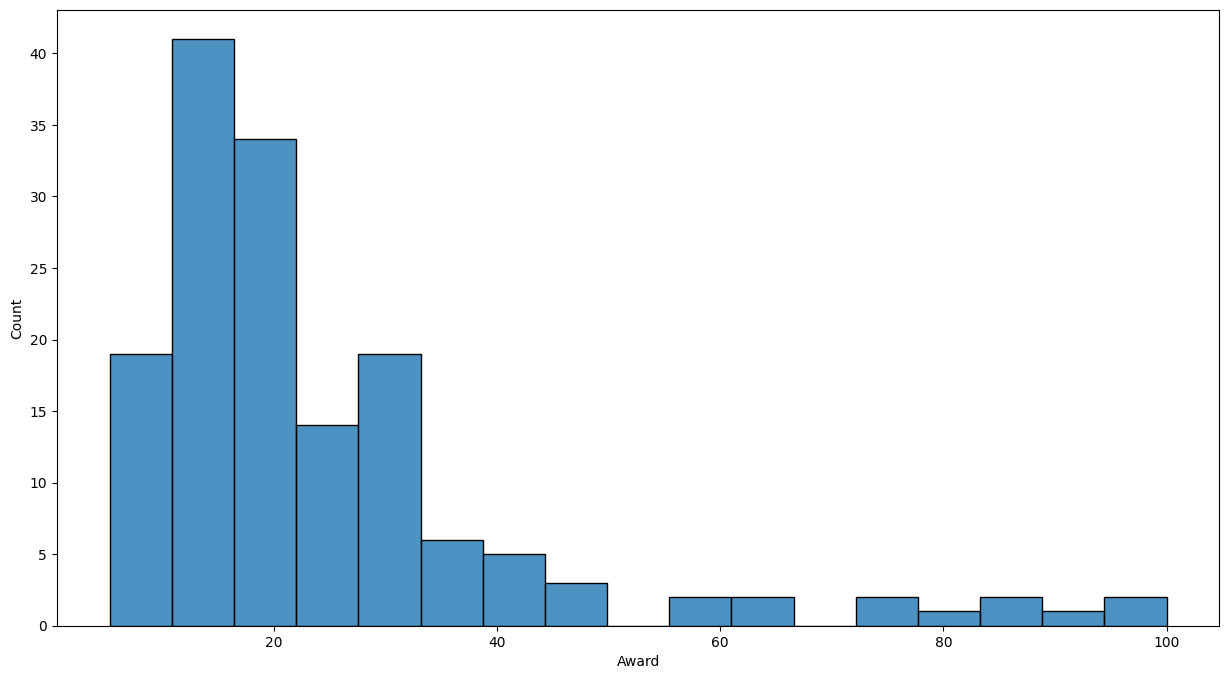

In [168]:
plt.figure(figsize=(15,8))
sns.histplot(
    shanghaiRanking_alumni[shanghaiRanking['Award'] > 0],
    x='Award',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

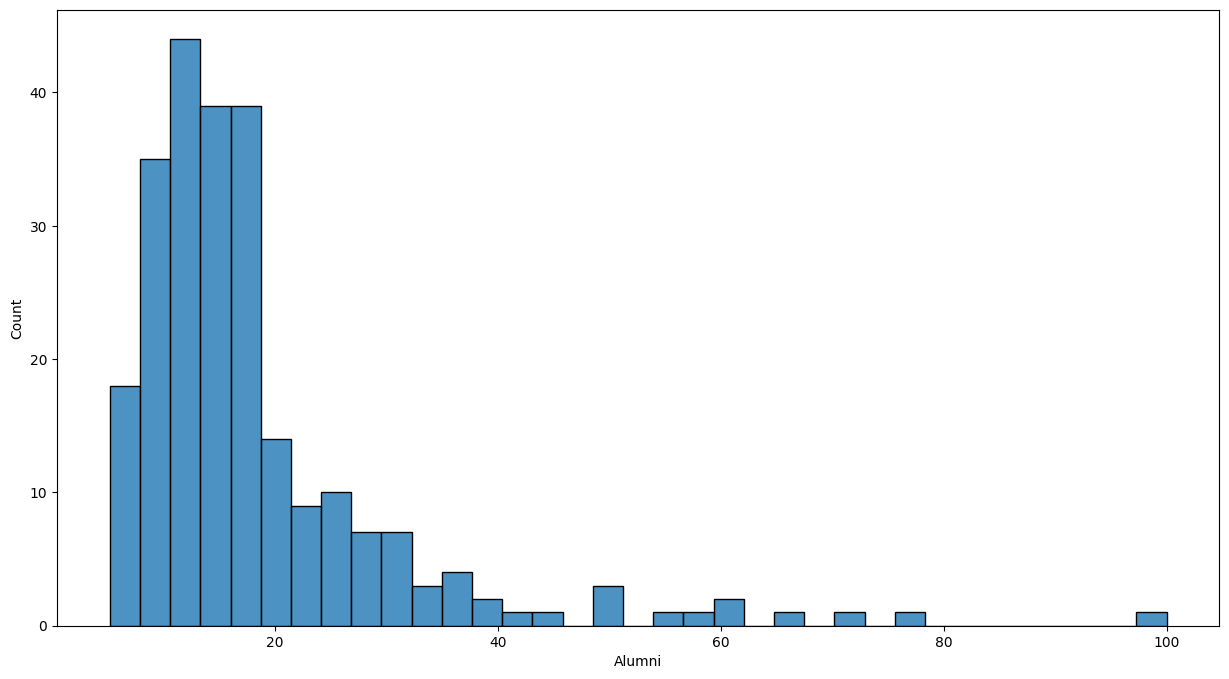

In [171]:
plt.figure(figsize=(15,8))
sns.histplot(
    shanghaiRanking_alumni[ (shanghaiRanking_alumni['Alumni'] > 0)],
    x='Alumni',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

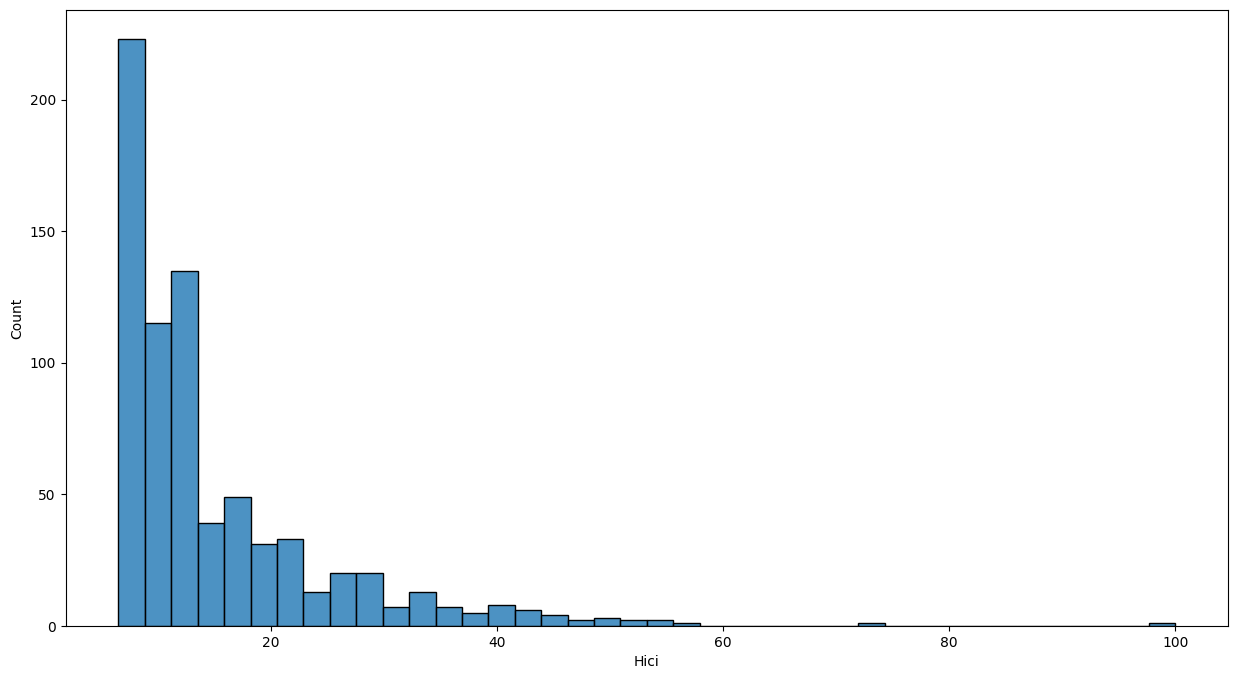

In [198]:
plt.figure(figsize=(15,8))
sns.histplot(
    shanghaiRanking_alumni[(shanghaiRanking_alumni['Hici'] > 0)],
    x='Hici',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

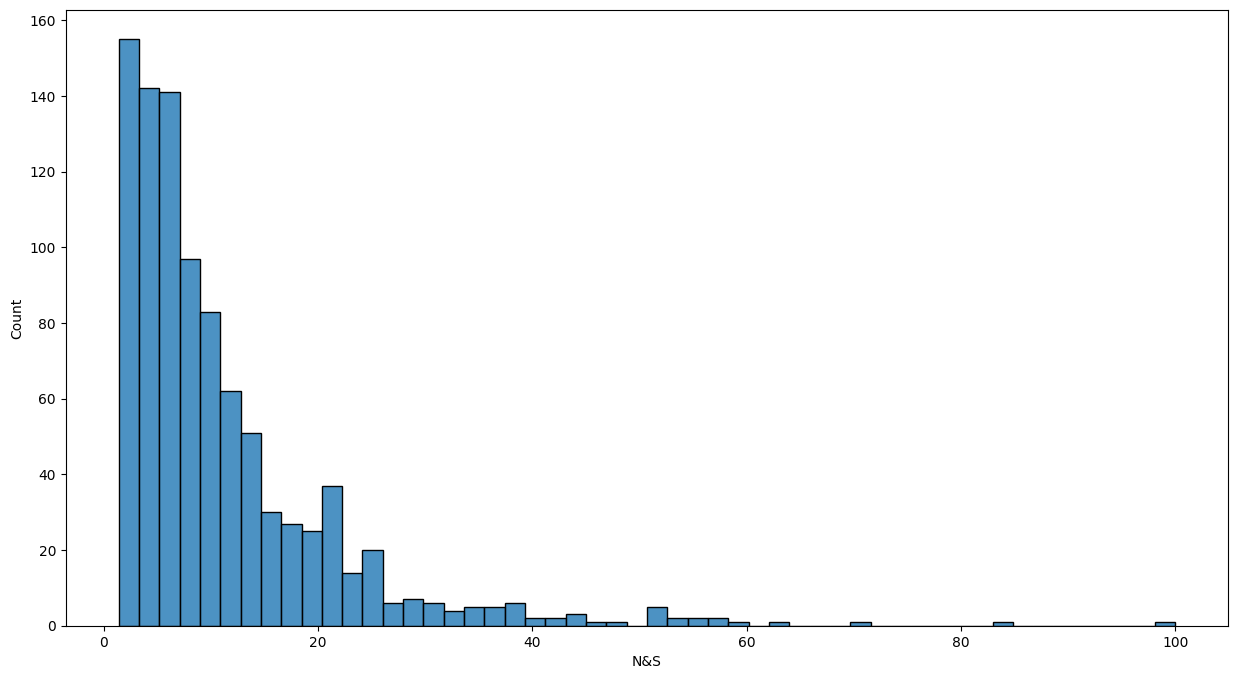

In [207]:
plt.figure(figsize=(15,8))
sns.histplot(
    shanghaiRanking_alumni[(shanghaiRanking_alumni['N&S'] > 0)],
    x='N&S',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

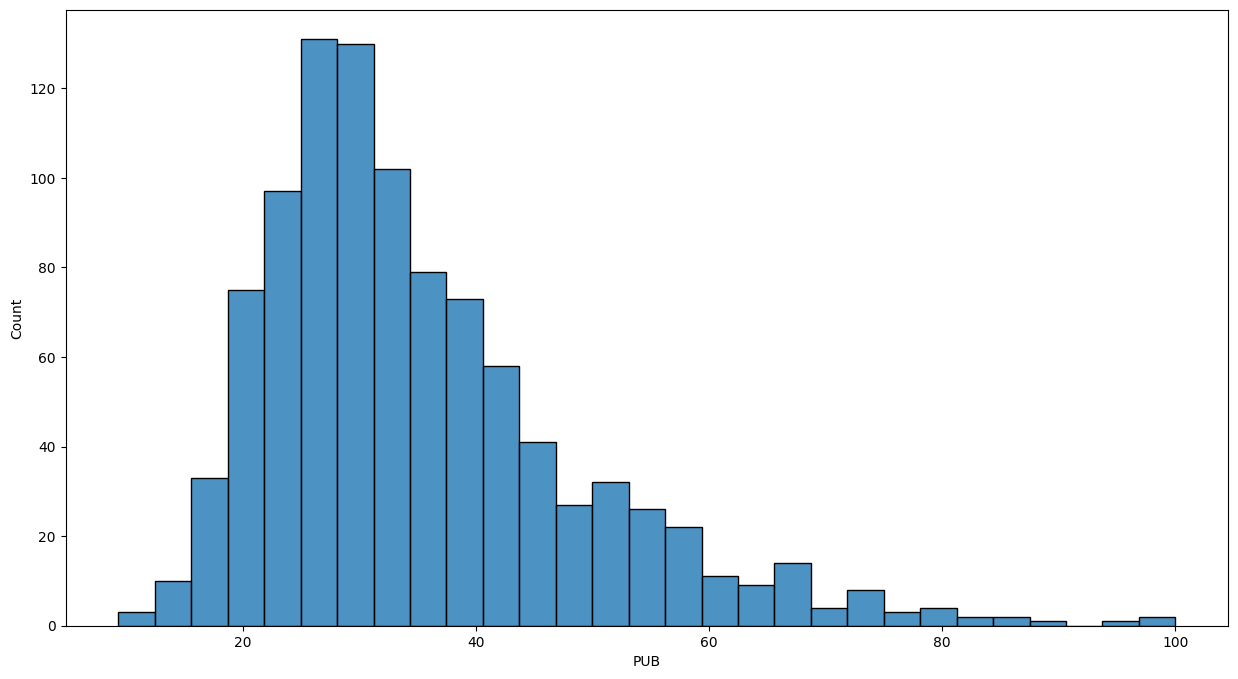

In [201]:
plt.figure(figsize=(15,8))
sns.histplot(
    shanghaiRanking_alumni[(shanghaiRanking_alumni['PUB'] > 0)],
    x='PUB',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

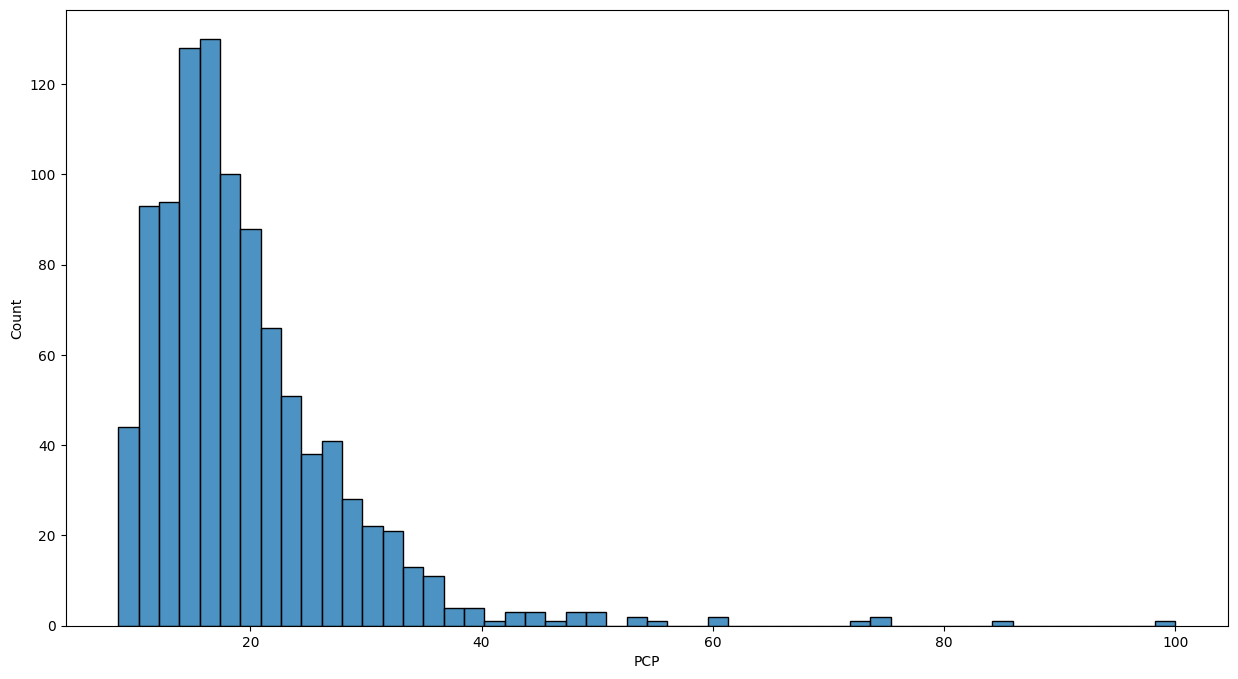

In [209]:
plt.figure(figsize=(15,8))
sns.histplot(
    shanghaiRanking_alumni[(shanghaiRanking_alumni['PCP'] > 0)],
    x='PCP',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

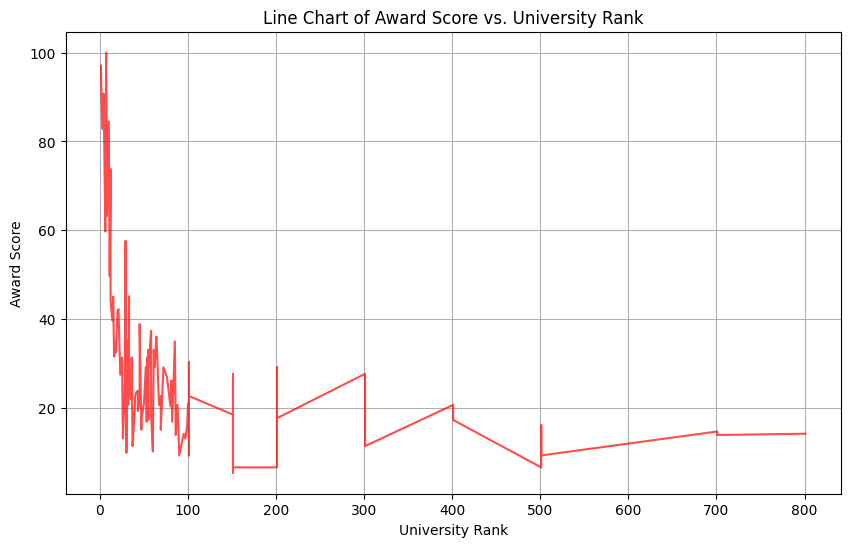

In [192]:
df = shanghaiRanking_alumni[shanghaiRanking_alumni['Award'] > 0]
plt.figure(figsize=(10, 6))
plt.plot(df["Rank"], df['Award'], color="red", alpha=0.7)

plt.xlabel("University Rank")  
plt.ylabel("Award Score")  # 
plt.title("Line Chart of Award Score vs. University Rank")

plt.grid()
plt.show()

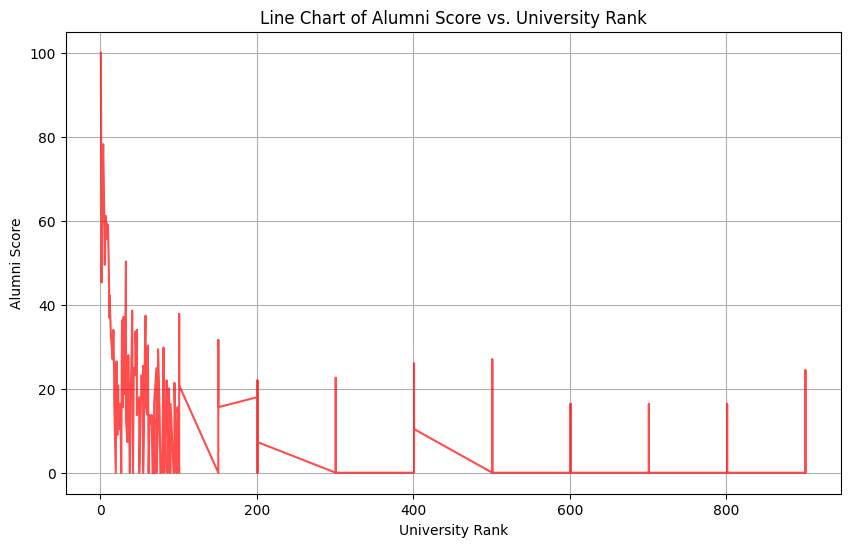

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(shanghaiRanking_alumni["Rank"], shanghaiRanking_alumni["Alumni"], color="red", alpha=0.7)

plt.xlabel("University Rank") 
plt.ylabel("Alumni Score")  
plt.title("Line Chart of Alumni Score vs. University Rank")

plt.grid()
plt.show()

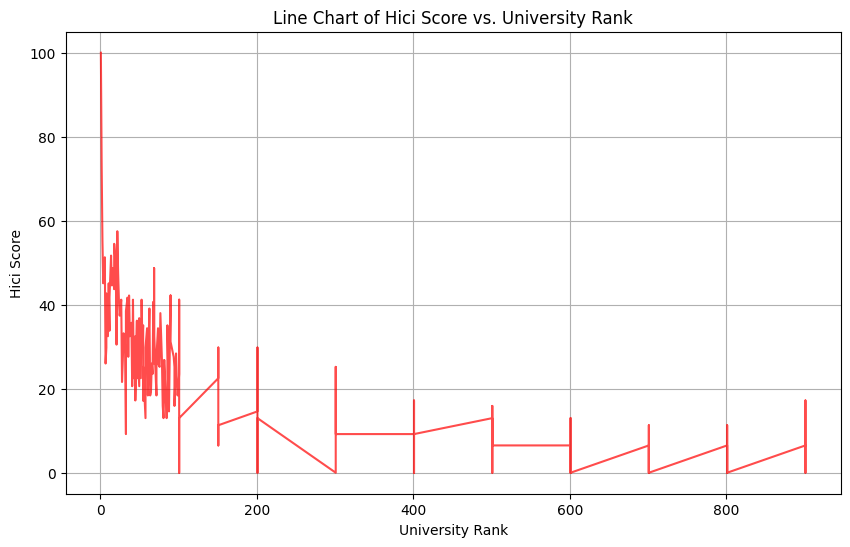

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(shanghaiRanking_alumni["Rank"], shanghaiRanking_alumni["Hici"], color="red", alpha=0.7)

plt.xlabel("University Rank") 
plt.ylabel("Hici Score")  
plt.title("Line Chart of Hici Score vs. University Rank")

plt.grid()
plt.show()

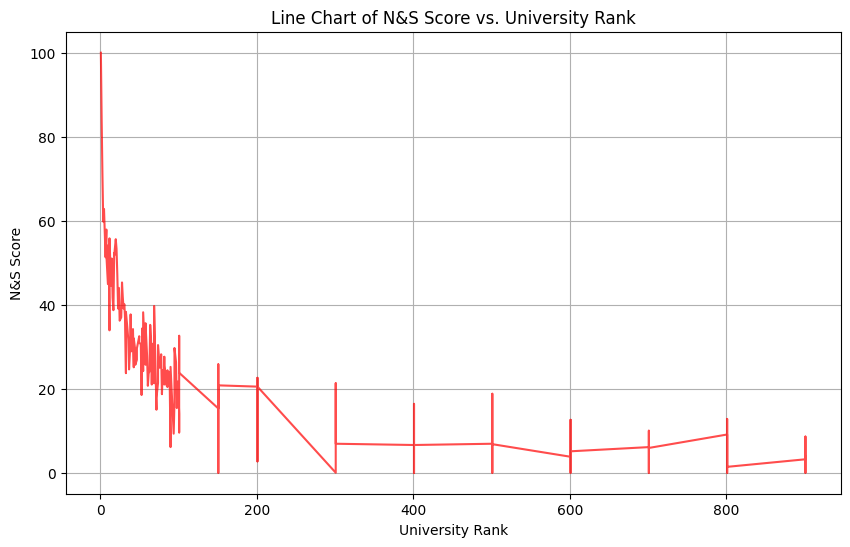

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(shanghaiRanking_alumni["Rank"], shanghaiRanking_alumni["N&S"], color="red", alpha=0.7)

plt.xlabel("University Rank") 
plt.ylabel("N&S Score")  
plt.title("Line Chart of N&S Score vs. University Rank")

plt.grid()
plt.show()

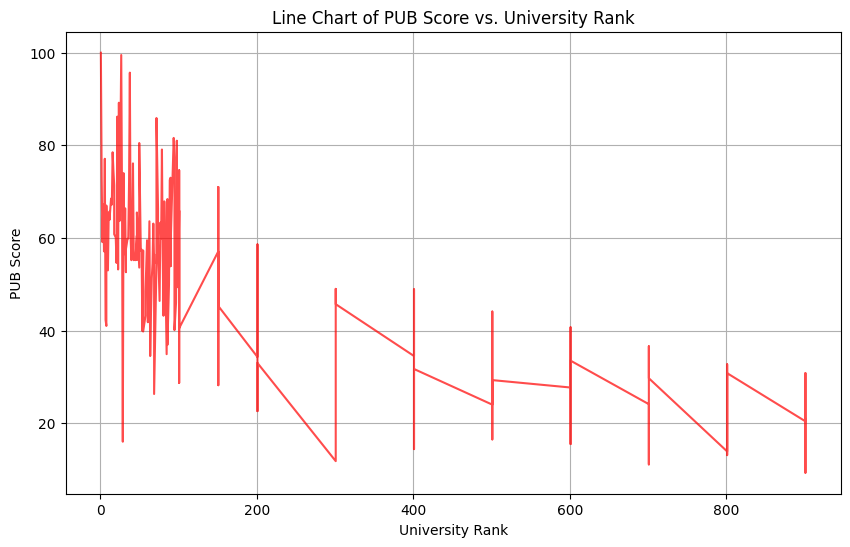

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(shanghaiRanking_alumni["Rank"], shanghaiRanking_alumni["PUB"], color="red", alpha=0.7)

plt.xlabel("University Rank") 
plt.ylabel("PUB Score")  
plt.title("Line Chart of PUB Score vs. University Rank")

plt.grid()
plt.show()

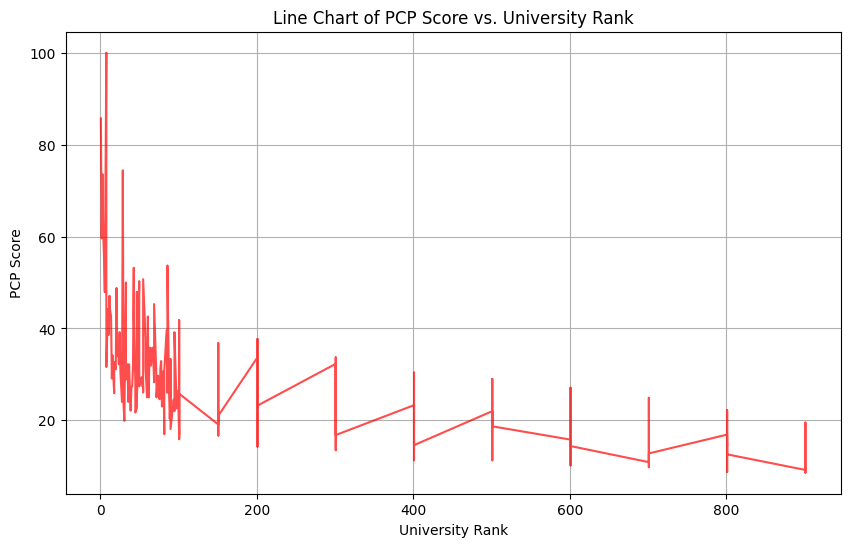

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(shanghaiRanking_alumni["Rank"], shanghaiRanking_alumni["PCP"], color="red", alpha=0.7)

plt.xlabel("University Rank") 
plt.ylabel("PCP Score")  
plt.title("Line Chart of PCP Score vs. University Rank")

plt.grid()
plt.show()

##### WordRankUniversity

In [121]:
#WordRankUniversity = WordRankUniversity
WordRankUniversity.head(2)

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,100.0
1,2,Massachusetts Institute of Technology,USA,2.0,4.0,12.0,2.0,12.0,96.8


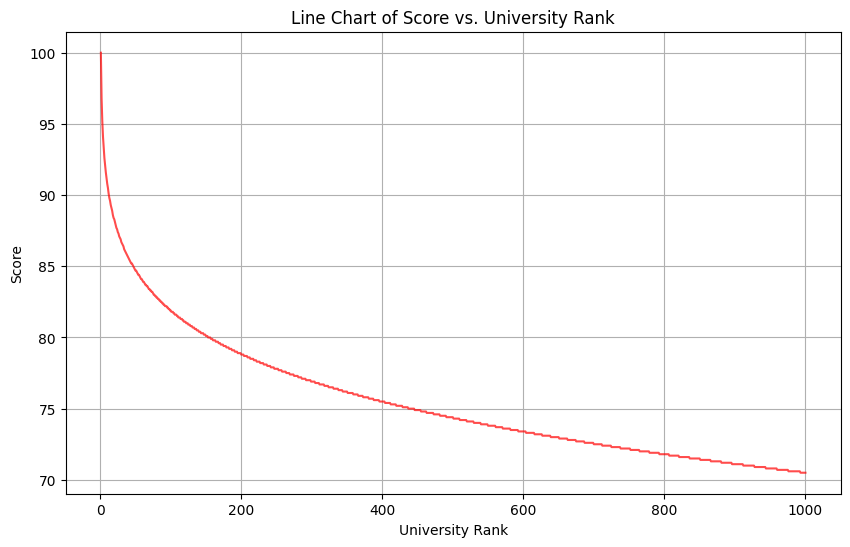

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(WordRankUniversity["World Rank"], WordRankUniversity["Score"], color="red", alpha=0.7)

plt.xlabel("University Rank")  # Now Rank is on the X-axis
plt.ylabel("Score")  # Now Alumni Score is on the Y-axis
plt.title("Line Chart of Score vs. University Rank")

plt.grid()
plt.show()

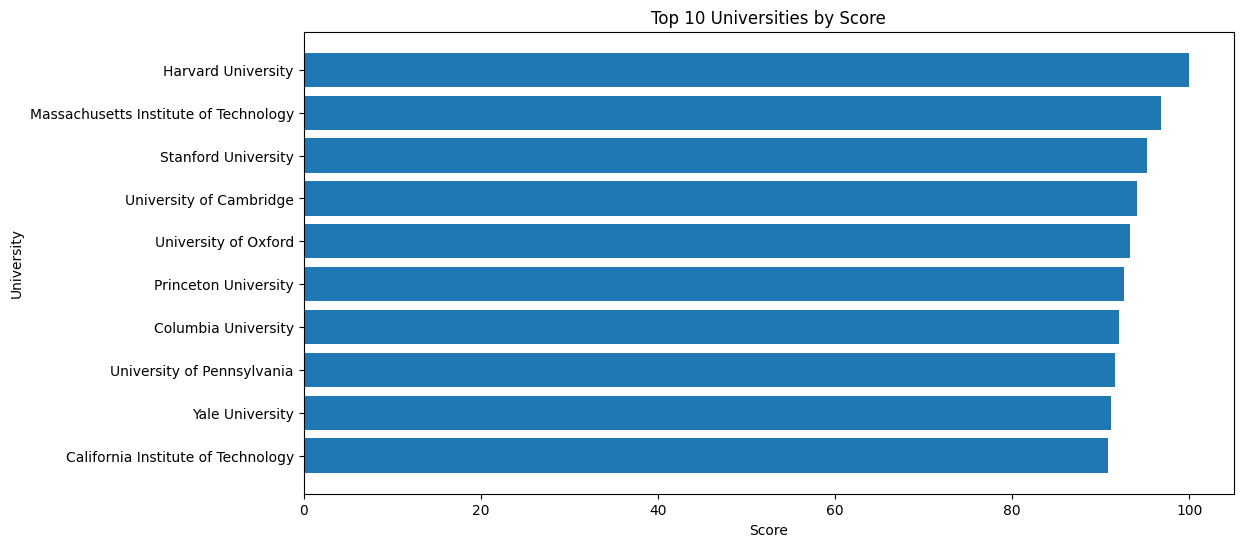

In [123]:
top_10 = WordRankUniversity.nlargest(10, "Score")

plt.figure(figsize=(12, 6))
plt.barh(top_10["Institution"], top_10["Score"])
plt.xlabel("Score")
plt.ylabel("University")
plt.title("Top 10 Universities by Score")
plt.gca().invert_yaxis()
plt.show()

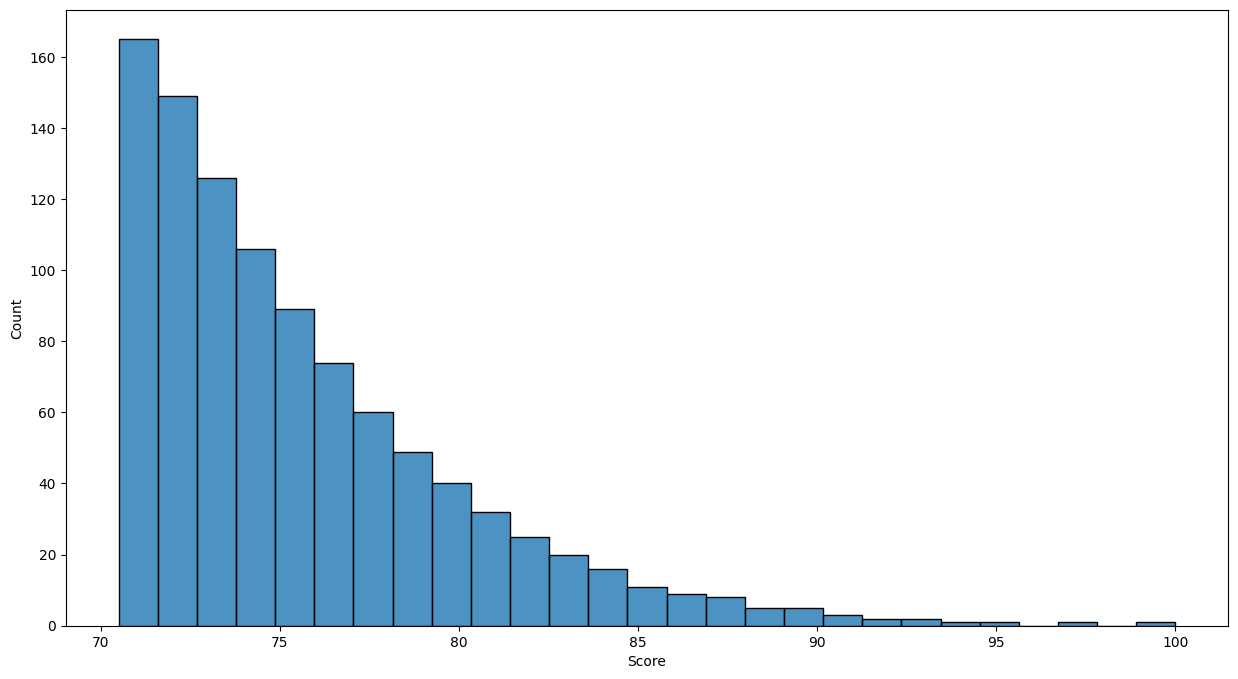

In [124]:
plt.figure(figsize=(15,8))
sns.histplot(
    WordRankUniversity,
    x='Score',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

##### TimesHigher

In [129]:
TimesHigher.columns

Index(['rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'url', 'nid', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'unaccredited', 'disabled', 'female_percentage',
       'male_percentage', 'rank_end_range'],
      dtype='object')

In [130]:
#WordRankUniversity = WordRankUniversity
TimesHigher_df = TimesHigher[TimesHigher['rank'] > 0]

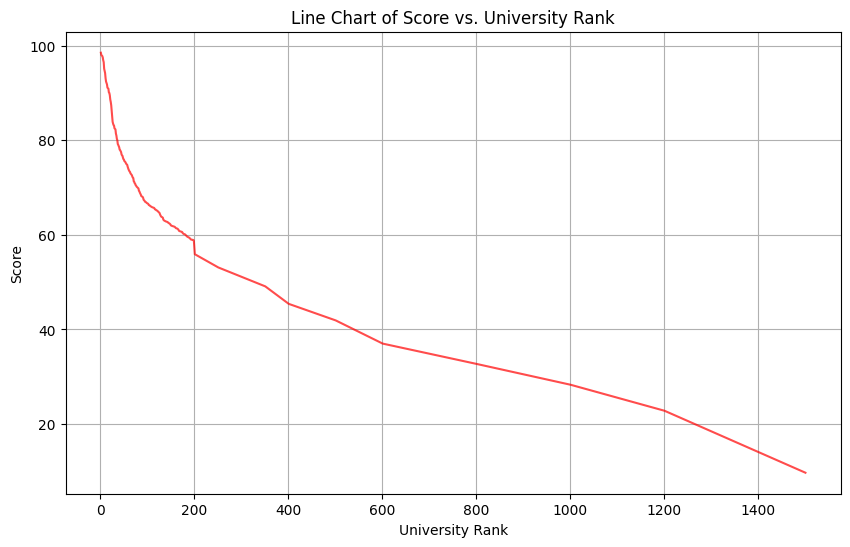

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(TimesHigher_df["rank"], TimesHigher_df["scores_overall"], color="red", alpha=0.7)

plt.xlabel("University Rank")  
plt.ylabel("Score")  
plt.title("Line Chart of Score vs. University Rank")

plt.grid()
plt.show()

Text(0, 0.5, 'Frequency')

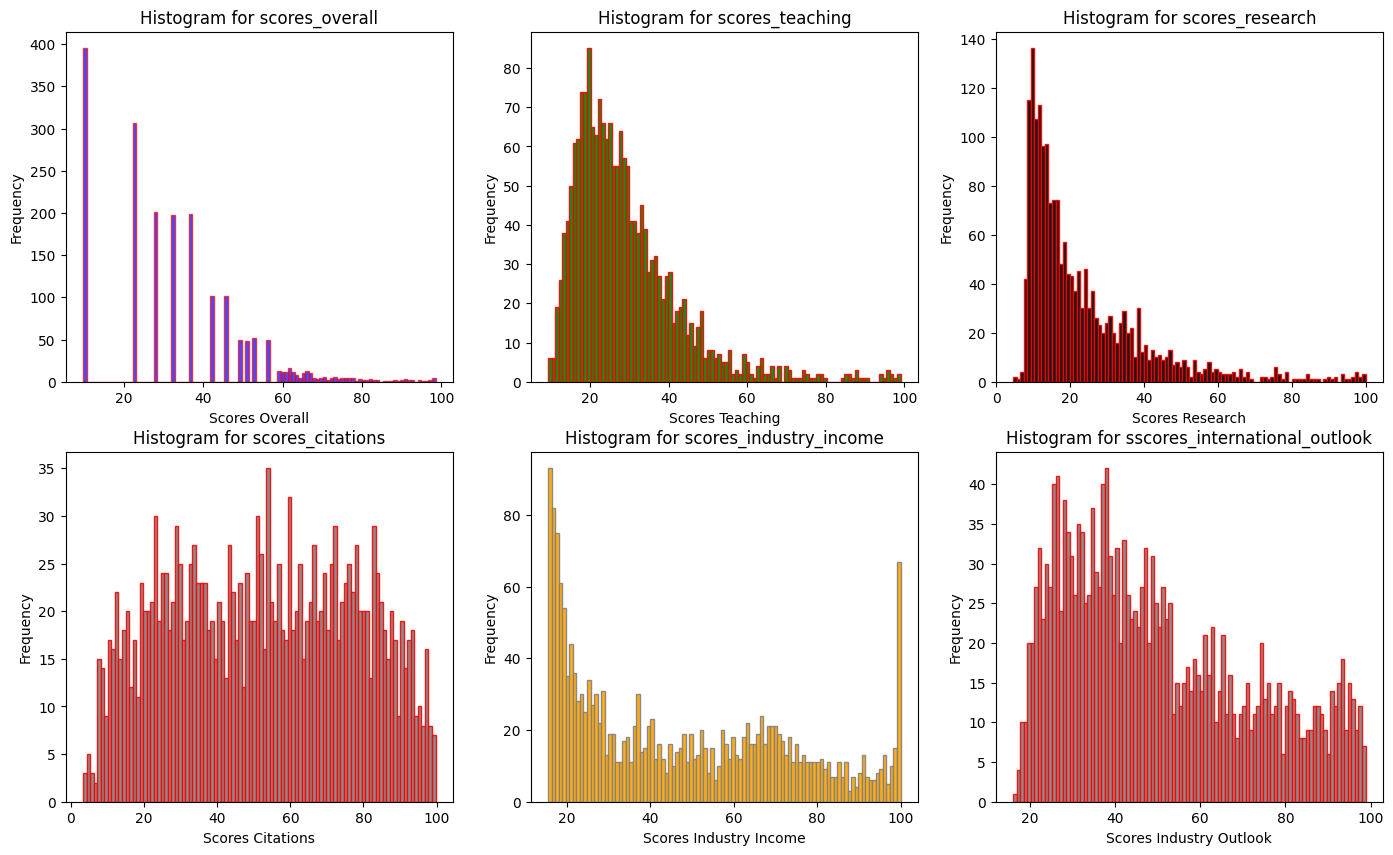

In [273]:
fig, axes = plt.subplots(2, 3, figsize=(17, 10))
axes[0][0].hist(
    TimesHigher_df['scores_overall'],edgecolor = 'red',bins=100, alpha=0.7, color='blue');
axes[0][0].set_title('Histogram for scores_overall')
axes[0][0].set_xlabel('Scores Overall')  # X-axis label
axes[0][0].set_ylabel('Frequency')  # Y-axis label

axes[0][1].hist(
    TimesHigher_df['scores_teaching'],edgecolor = 'red',bins=100, alpha=0.9, color='green');
axes[0][1].set_title('Histogram for scores_teaching')
axes[0][1].set_xlabel('Scores Teaching')  # X-axis label
axes[0][1].set_ylabel('Frequency')  # Y-axis label

axes[0][2].hist(
    TimesHigher_df['scores_research'],edgecolor = 'red',bins=100, alpha=0.9, color='black');
axes[0][2].set_title('Histogram for scores_research')
axes[0][2].set_xlabel('Scores Research')  
axes[0][2].set_ylabel('Frequency')  

axes[1][0].hist(
    TimesHigher_df['scores_citations'],edgecolor = 'red',bins=100, alpha=0.9, color='grey');
axes[1][0].set_title('Histogram for scores_citations')
axes[1][0].set_xlabel('Scores Citations')  # X-axis label
axes[1][0].set_ylabel('Frequency')  # Y-axis label

axes[1][1].hist(
    TimesHigher_df['scores_industry_income'],edgecolor = 'grey',bins=100, alpha=0.9, color='orange');
axes[1][1].set_title('Histogram for scores_industry_income')
axes[1][1].set_xlabel('Scores Industry Income')  # X-axis label
axes[1][1].set_ylabel('Frequency')  # Y-axis label

axes[1][2].hist(
    TimesHigher_df['scores_international_outlook'],edgecolor = 'red',bins=100, alpha=0.9, color='grey');
axes[1][2].set_title('Histogram for sscores_international_outlook')
axes[1][2].set_xlabel('Scores Industry Outlook')  # X-axis label
axes[1][2].set_ylabel('Frequency')  # Y-axis label



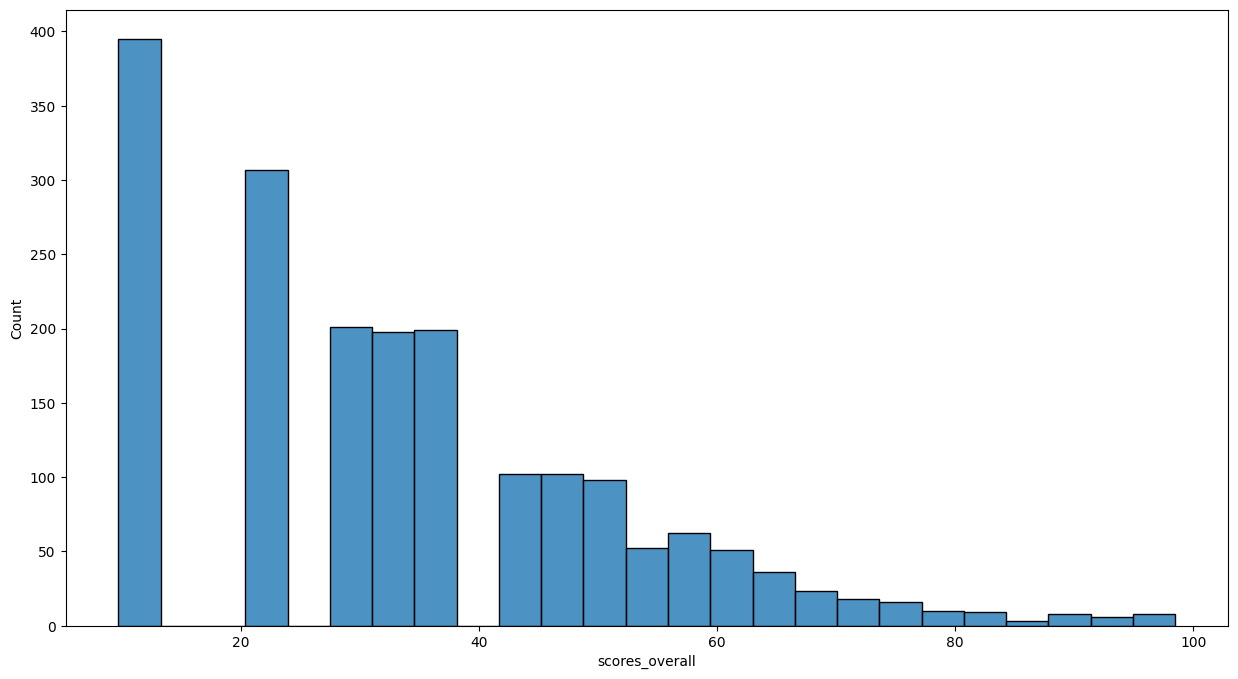

In [229]:
plt.figure(figsize=(15,8))
sns.histplot(
    TimesHigher_df,
    x='scores_overall',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

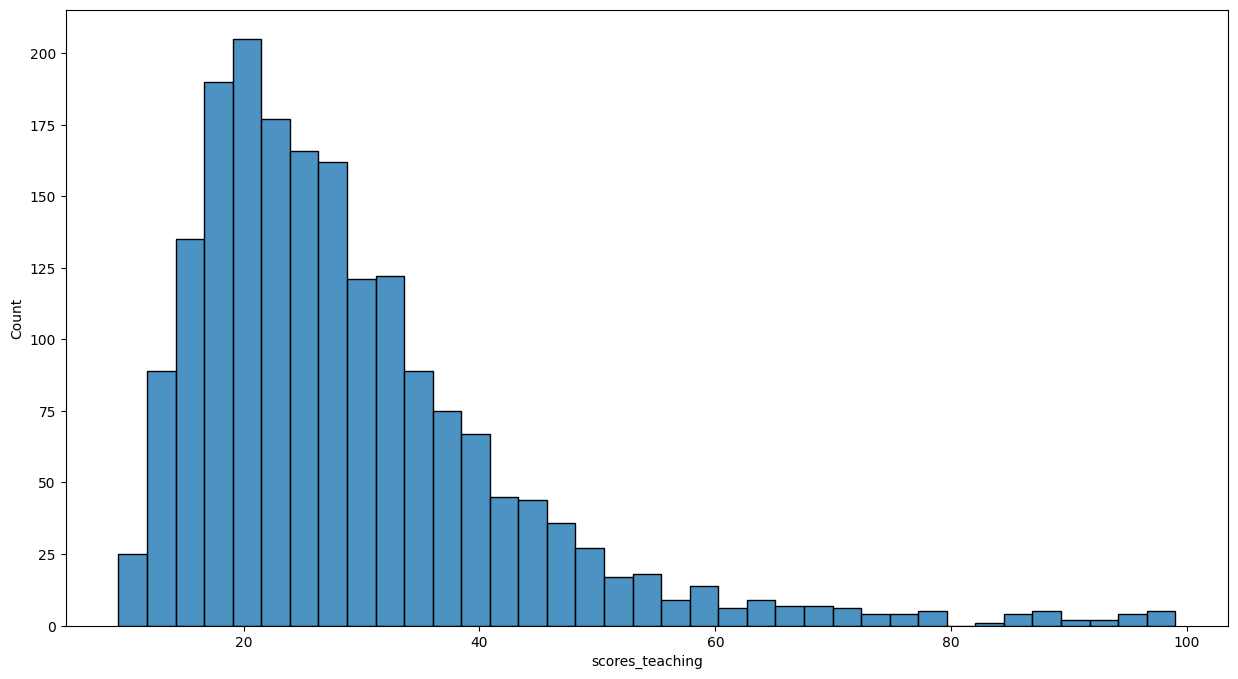

In [132]:
plt.figure(figsize=(15,8))
sns.histplot(
    TimesHigher_df,
    x='scores_teaching',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

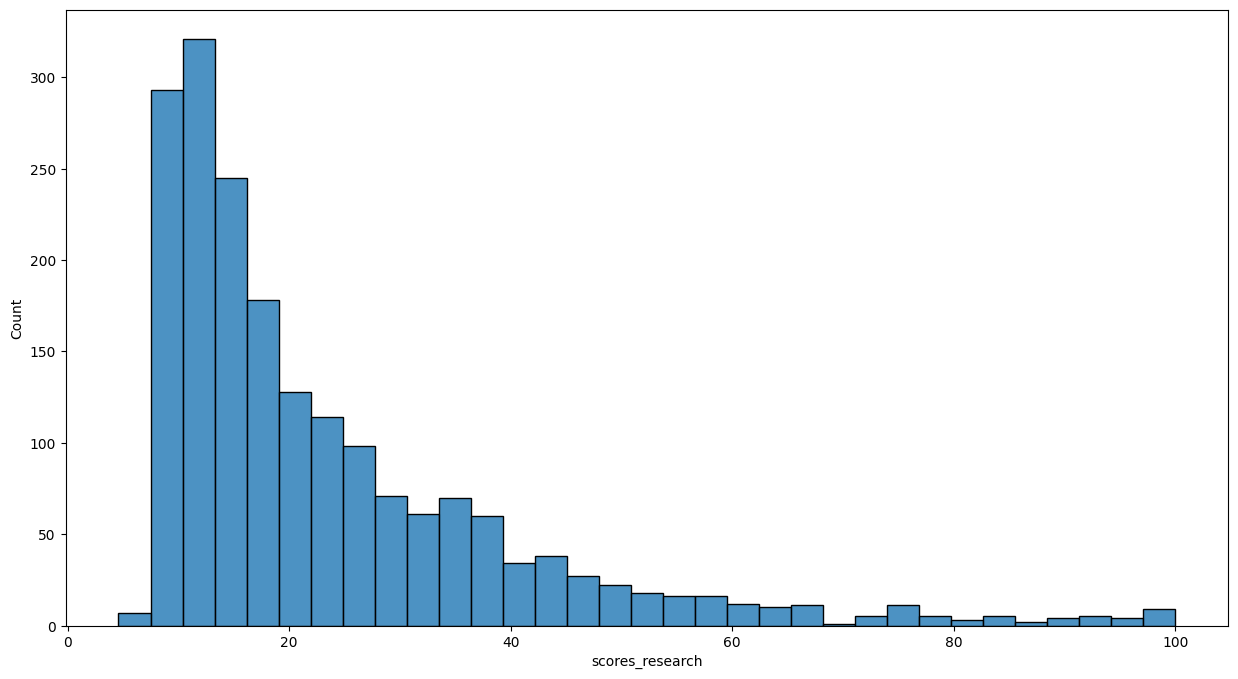

In [133]:
plt.figure(figsize=(15,8))
sns.histplot(
    TimesHigher_df,
    x='scores_research',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

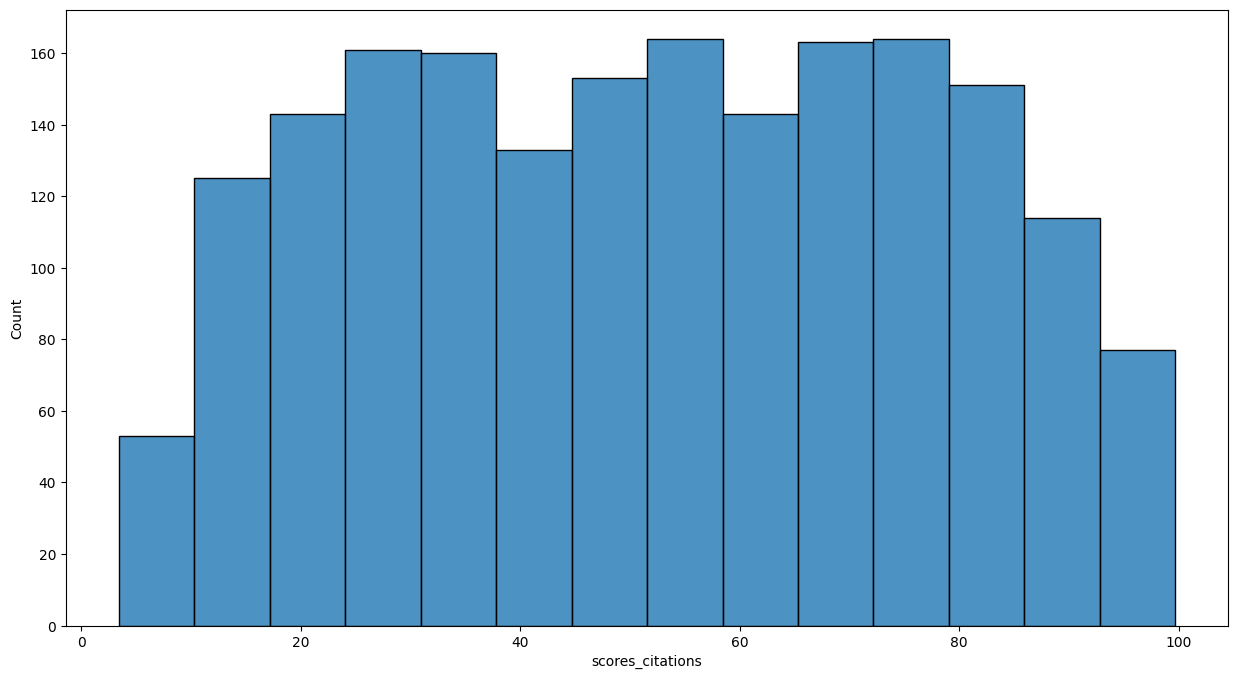

In [134]:
plt.figure(figsize=(15,8))
sns.histplot(
    TimesHigher_df,
    x='scores_citations',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

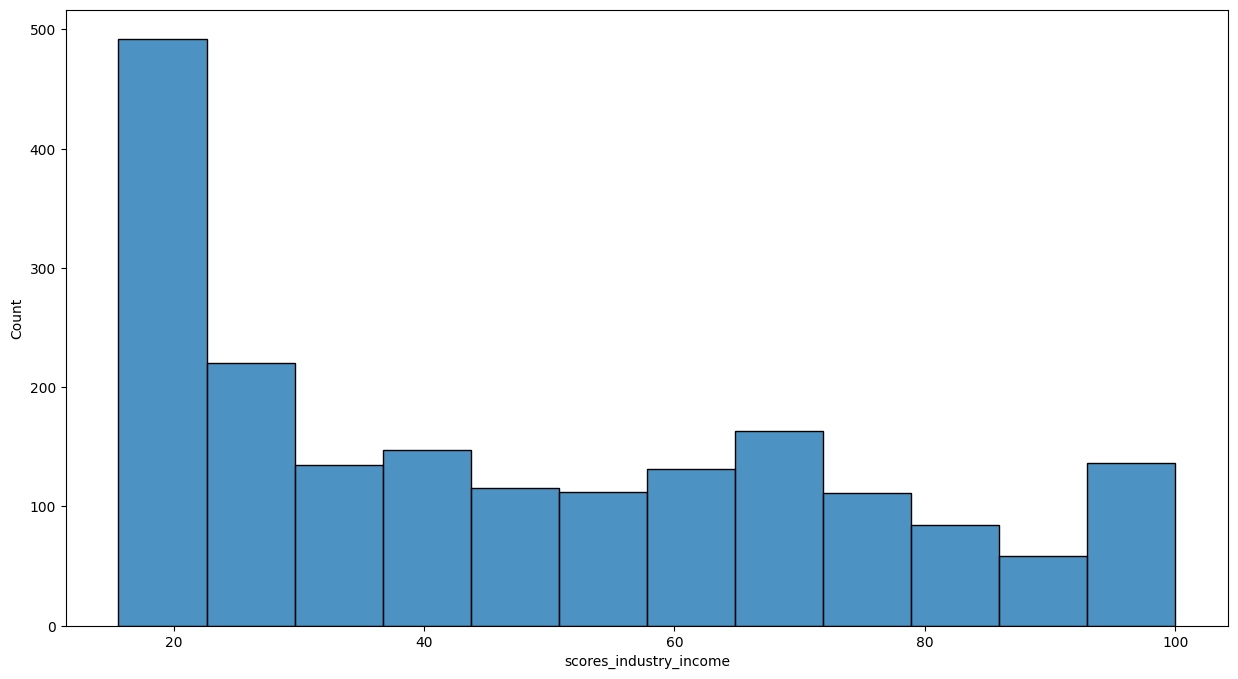

In [135]:
plt.figure(figsize=(15,8))
sns.histplot(
    TimesHigher_df,
    x='scores_industry_income',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

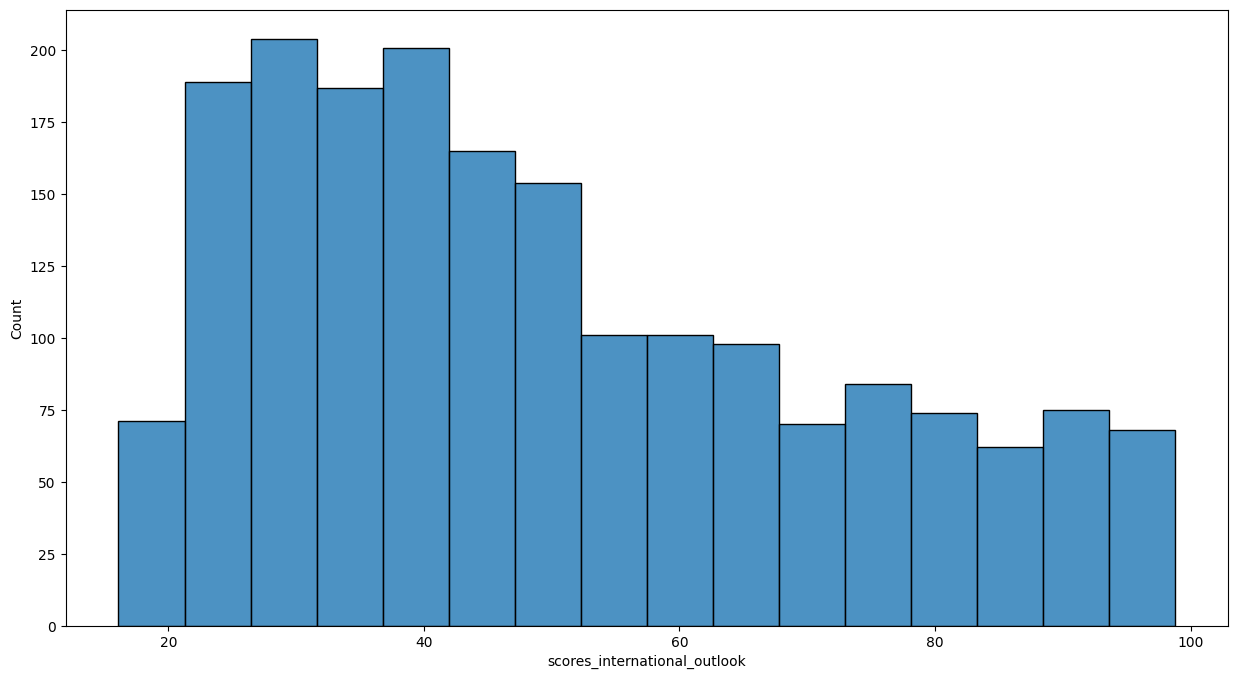

In [136]:
plt.figure(figsize=(15,8))
sns.histplot(
    TimesHigher_df,
    x='scores_international_outlook',
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

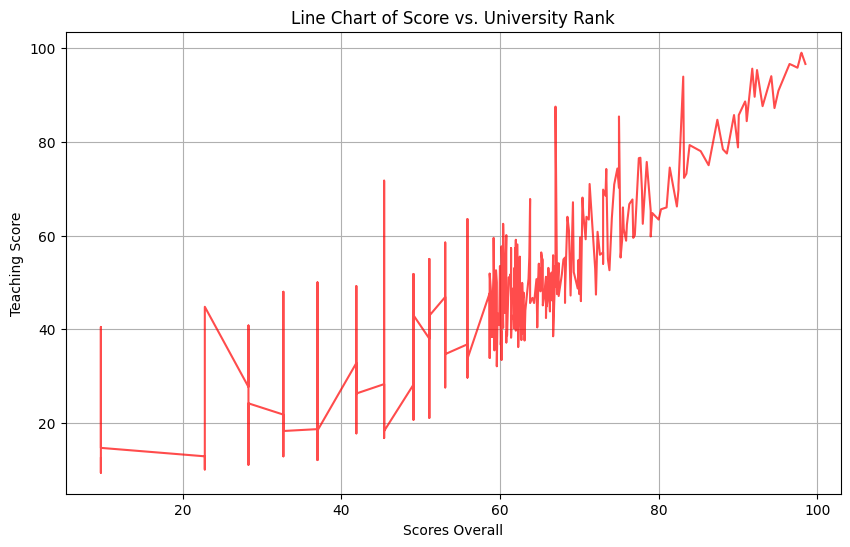

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(TimesHigher_df["scores_overall"], TimesHigher_df["scores_teaching"], color="red", alpha=0.7)

plt.xlabel("Scores Overall")  # Now Rank is on the X-axis
plt.ylabel("Teaching Score")  # Now Alumni Score is on the Y-axis
plt.title("Line Chart of Score vs. University Rank")

plt.grid()
plt.show()

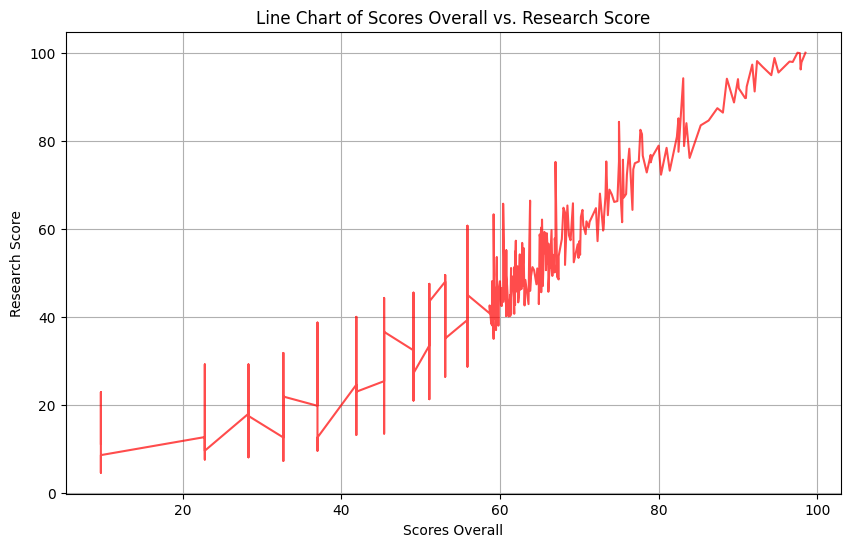

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(TimesHigher_df["scores_overall"], TimesHigher_df["scores_research"], color="red", alpha=0.7)

plt.xlabel("Scores Overall")  # Now Rank is on the X-axis
plt.ylabel("Research Score")  # Now Alumni Score is on the Y-axis
plt.title("Line Chart of Scores Overall vs. Research Score")

plt.grid()
plt.show()

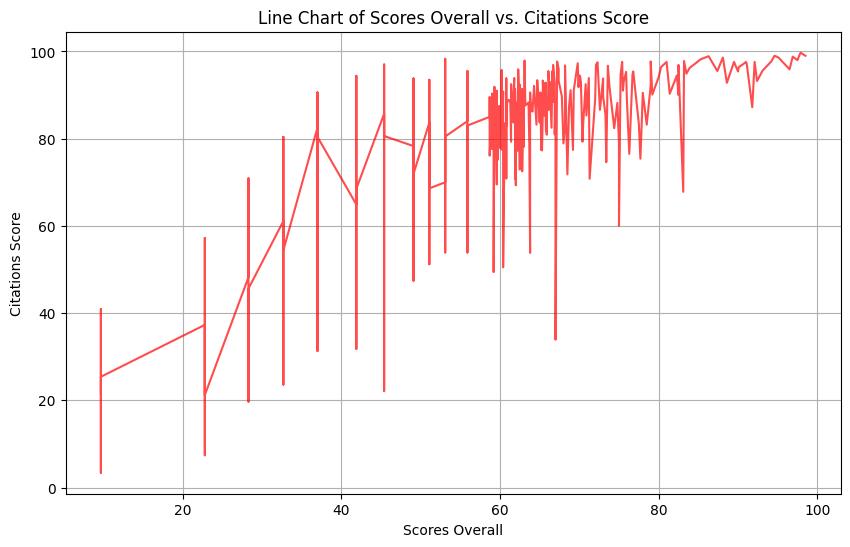

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(TimesHigher_df["scores_overall"], TimesHigher_df["scores_citations"], color="red", alpha=0.7)

plt.xlabel("Scores Overall")  
plt.ylabel("Citations Score")  
plt.title("Line Chart of Scores Overall vs. Citations Score")

plt.grid()
plt.show()

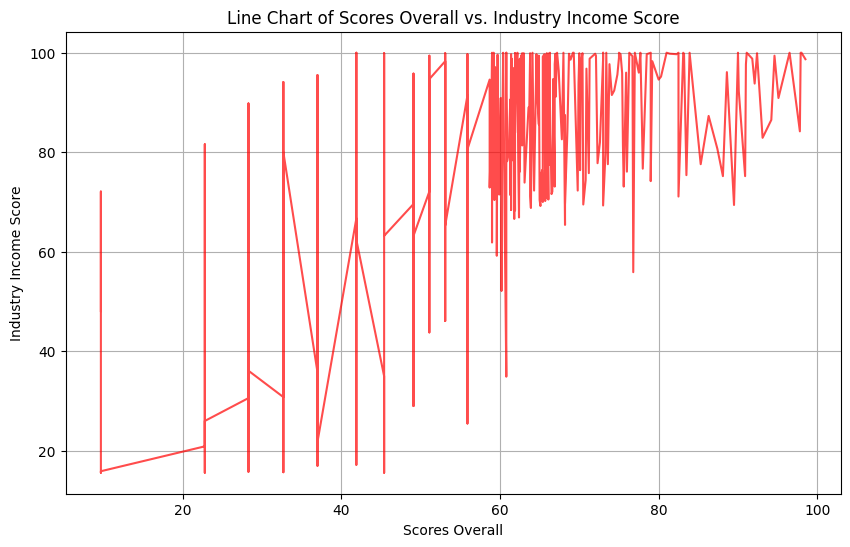

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(TimesHigher_df["scores_overall"], TimesHigher_df["scores_industry_income"], color="red", alpha=0.7)

plt.xlabel("Scores Overall")  
plt.ylabel("Industry Income Score")  
plt.title("Line Chart of Scores Overall vs. Industry Income Score")

plt.grid()
plt.show()

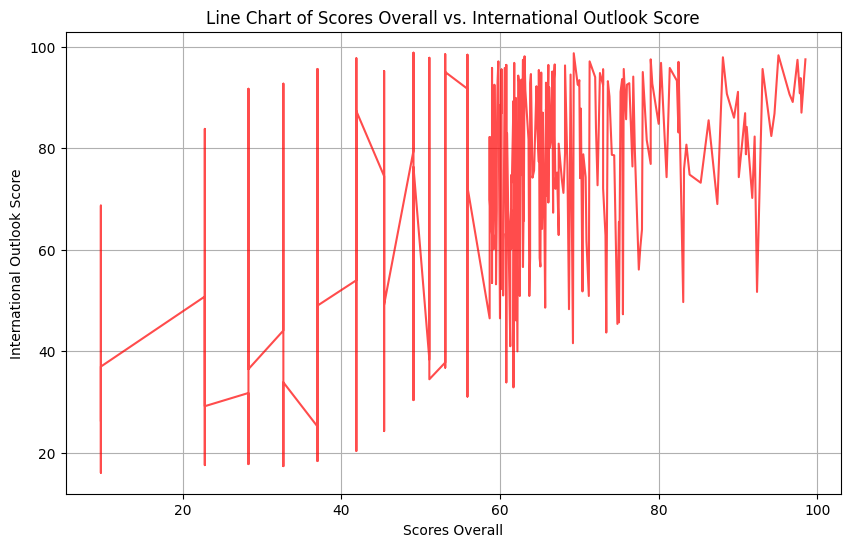

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(TimesHigher_df["scores_overall"], TimesHigher_df["scores_international_outlook"], color="red", alpha=0.7)

plt.xlabel("Scores Overall")  
plt.ylabel("International Outlook Score")  
plt.title("Line Chart of Scores Overall vs. International Outlook Score")

plt.grid()
plt.show()

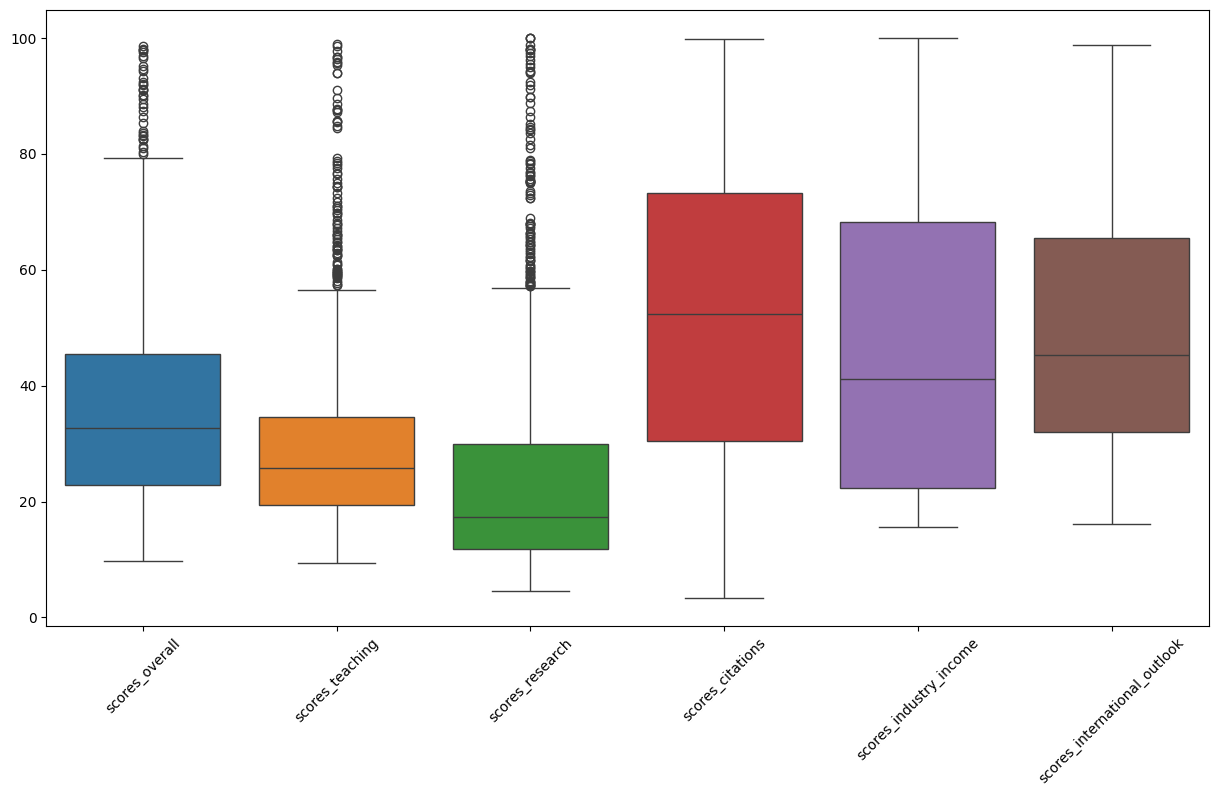

In [247]:
tm_df = TimesHigher[TimesHigher['rank'] > 0]
plt.figure(figsize=(15,8))
sns.boxplot(
    data=tm_df[['scores_overall','scores_teaching','scores_research','scores_citations','scores_industry_income','scores_international_outlook']])
plt.xticks(rotation=45)
plt.show()
    

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

##### shanghaiRanking

In [193]:
shanghaiRanking.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1000.0,458.4200,277.116068,1.0,201.000,451.0,701.000,901.0
National/Regional Rank,1000.0,42.1250,51.213340,1.0,5.000,19.0,60.000,180.0
Alumni,1000.0,4.5096,10.103201,0.0,0.000,0.0,0.000,100.0
Award,1000.0,3.7812,11.455380,0.0,0.000,0.0,0.000,100.0
Hici,1000.0,10.7344,10.949265,0.0,0.000,9.2,14.600,100.0
N&S,1000.0,10.4588,10.635928,0.0,3.800,7.2,13.200,100.0
PUB,1000.0,35.1130,13.684495,9.3,25.775,31.7,41.425,100.0
PCP,1000.0,19.6553,8.800436,8.6,14.100,17.6,23.000,100.0
rank_end_range,1000.0,542.5200,298.698491,1.0,300.000,550.0,800.000,1000.0
Regional_rank_end_range,1000.0,49.5990,58.008544,1.0,7.000,22.0,78.000,203.0


In [ ]:
# We assumed that the 0 is outlier
shanghaiRanking[(shanghaiRanking_alumni['Alumni'] > 0)]['Alumni'].describe().T

count    244.000000
mean      18.481967
std       12.662573
min        5.200000
25%       11.600000
50%       14.700000
75%       20.275000
max      100.000000
Name: Alumni, dtype: float64

In [ ]:
# We assumed that the 0 is outlier
shanghaiRanking[(shanghaiRanking_alumni['Award'] > 0)]['Award'].describe().T

count    153.000000
mean      24.713725
std       18.486204
min        5.300000
25%       13.800000
50%       18.400000
75%       29.100000
max      100.000000
Name: Award, dtype: float64

In [211]:
# We assumed that the 0 is outlier
shanghaiRanking[(shanghaiRanking_alumni['Hici'] > 0)]['Hici'].describe().T

count    740.000000
mean      14.505946
std       10.357692
min        6.500000
25%        6.500000
50%       11.300000
75%       17.200000
max      100.000000
Name: Hici, dtype: float64

In [ ]:
# We assumed that the 0 is outlier
shanghaiRanking[(shanghaiRanking_alumni['N&S'] > 0)]['N&S'].describe().T

count    948.000000
mean      11.032489
std       10.630083
min        1.400000
25%        4.400000
50%        7.600000
75%       13.725000
max      100.000000
Name: N&S, dtype: float64

In [ ]:
# We assumed that the 0 is outlier
shanghaiRanking[(shanghaiRanking_alumni['PUB'] > 0)]['PUB'].describe().T

count    1000.000000
mean       35.113000
std        13.684495
min         9.300000
25%        25.775000
50%        31.700000
75%        41.425000
max       100.000000
Name: PUB, dtype: float64

In [ ]:
# We assumed that the 0 is outlier
shanghaiRanking[(shanghaiRanking_alumni['PCP'] > 0)]['PCP'].describe().T

count    1000.000000
mean       19.655300
std         8.800436
min         8.600000
25%        14.100000
50%        17.600000
75%        23.000000
max       100.000000
Name: PCP, dtype: float64

##### WordRankUniversity

In [212]:
WordRankUniversity.describe().T

,count,mean,std,min,25%,50%,75%,max
World Rank,1000.0,500.5000,288.819436,1.0,250.75,500.50,750.25,1000.0
National Rank,1000.0,44.5860,52.659602,1.0,6.00,22.00,61.25,209.0
Education Rank,1000.0,447.9490,168.804287,1.0,385.75,551.00,551.00,551.0
Employability Rank,1000.0,724.5010,349.520836,1.0,430.75,1001.00,1001.00,1001.0
Faculty Rank,1000.0,245.6080,77.059357,1.0,277.25,284.00,284.00,284.0
Research Rank,1000.0,501.4400,290.392862,1.0,250.75,500.50,750.25,1001.0
Score,1000.0,75.6015,4.536597,70.5,72.20,74.35,77.80,100.0


##### TimesHigher

In [232]:
TimesHigher[TimesHigher['rank'] > 0].describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1904.0,844.603466,478.280292,1.0,401.000,801.00,1201.000,1501.0
scores_overall,1904.0,33.514601,18.561919,9.7,22.800,32.70,45.400,98.5
scores_overall_rank,1904.0,9525.000000,5497.817749,10.0,4767.500,9525.00,14282.500,19040.0
scores_teaching,1904.0,29.060662,13.967201,9.4,19.400,25.80,34.500,99.0
scores_teaching_rank,1904.0,952.500000,549.781775,1.0,476.750,952.50,1428.250,1904.0
scores_research,1904.0,23.416176,16.697923,4.6,11.800,17.25,29.900,100.0
scores_research_rank,1904.0,952.500000,549.781775,1.0,476.750,952.50,1428.250,1904.0
scores_citations,1904.0,52.189706,25.071342,3.4,30.400,52.40,73.225,99.7
scores_citations_rank,1904.0,952.500000,549.781775,1.0,476.750,952.50,1428.250,1904.0
scores_industry_income,1904.0,47.057405,26.150454,15.6,22.275,41.05,68.200,100.0


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

In [274]:
corr_matrix = shanghaiRanking.select_dtypes(include=np.number).corr()
corr_matrix

,Rank,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,rank_end_range,Regional_rank_end_range
Rank,1.000000,0.380439,-0.455802,-0.445994,-0.735653,-0.700110,-0.763044,-0.652169,0.996718,0.355351
National/Regional Rank,0.380439,1.000000,-0.216448,-0.184583,-0.278085,-0.287055,-0.303231,-0.321671,0.382483,0.996106
Alumni,-0.455802,-0.216448,1.000000,0.785131,0.485946,0.705757,0.380827,0.624922,-0.485890,-0.225790
Award,-0.445994,-0.184583,0.785131,1.000000,0.542474,0.741793,0.375987,0.679825,-0.481998,-0.194934
Hici,-0.735653,-0.278085,0.485946,0.542474,1.000000,0.789689,0.712207,0.646556,-0.763828,-0.273203
N&S,-0.700110,-0.287055,0.705757,0.741793,0.789689,1.000000,0.635355,0.757622,-0.733082,-0.291503
PUB,-0.763044,-0.303231,0.380827,0.375987,0.712207,0.635355,1.000000,0.464444,-0.785228,-0.286599
PCP,-0.652169,-0.321671,0.624922,0.679825,0.646556,0.757622,0.464444,1.000000,-0.673330,-0.324209
rank_end_range,0.996718,0.382483,-0.485890,-0.481998,-0.763828,-0.733082,-0.785228,-0.673330,1.000000,0.360628
Regional_rank_end_range,0.355351,0.996106,-0.225790,-0.194934,-0.273203,-0.291503,-0.286599,-0.324209,0.360628,1.000000


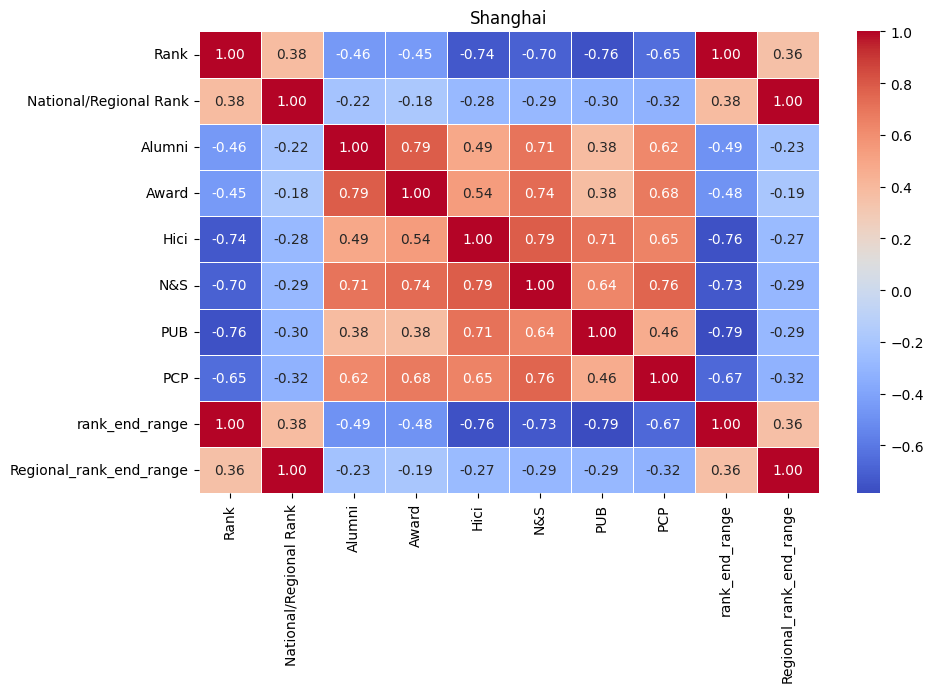

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Shanghai")
plt.show()

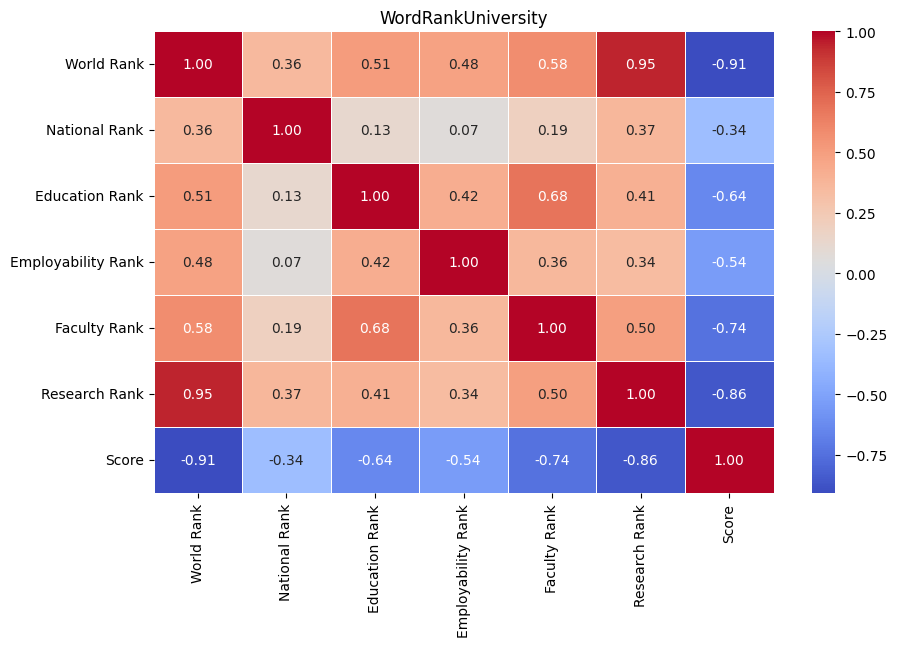

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(WordRankUniversity.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("WordRankUniversity")
plt.show()

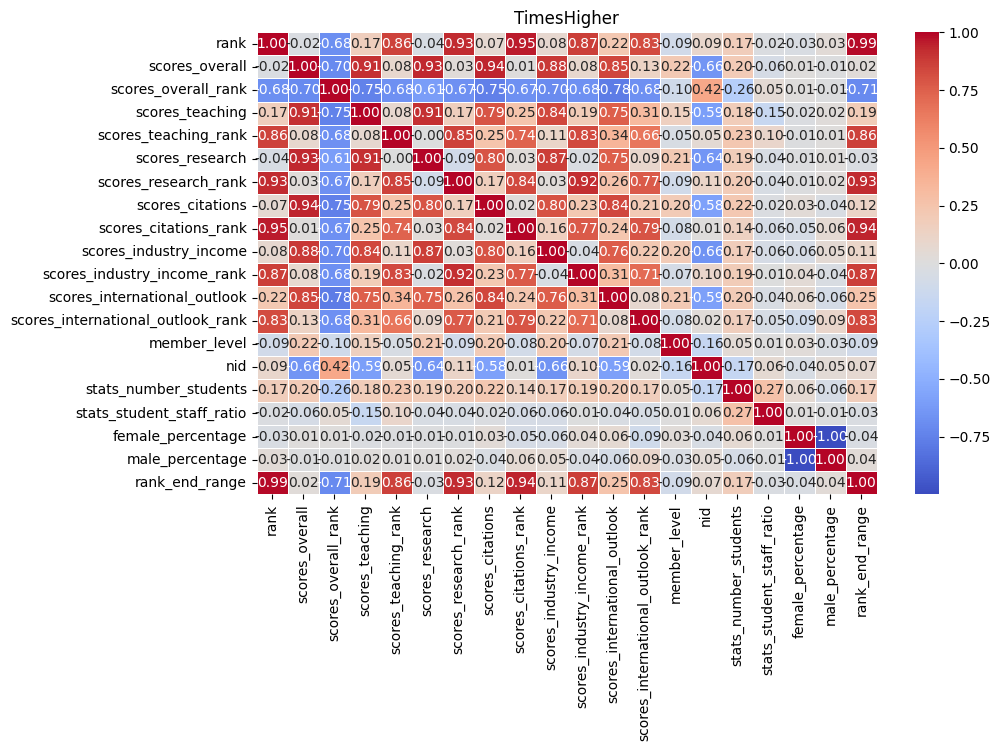

In [278]:
plt.figure(figsize=(10, 6))
sns.heatmap(TimesHigher.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("TimesHigher")
plt.show()

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

# Analysis (Answers)

#### Q1 Which universities are ranked in the top 10 globally?

In [280]:
shanghaiRanking.head(2)

,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP,rank_end_range,Regional_rank_end_range
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7,1,1
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6,2,2


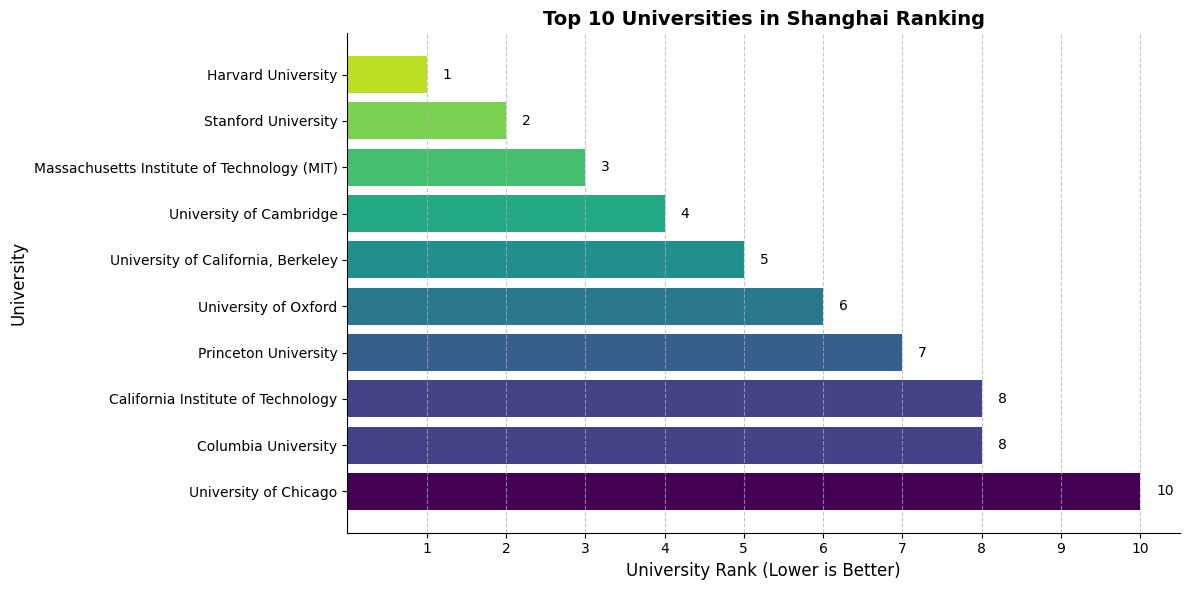

In [317]:
top_10 = shanghaiRanking.sort_values('Rank').head(10)





plt.figure(figsize=(12, 6))

colors = plt.cm.viridis_r(top_10['Rank'].values / top_10['Rank'].max()) # Reverse viridis

plt.barh(top_10["University_Name"], top_10["Rank"], color=colors)

plt.xlabel("University Rank (Lower is Better)", fontsize=12)  # Explicitly state "lower is better"
plt.ylabel("University", fontsize=12)
plt.title("Top 10 Universities in Shanghai Ranking", fontsize=14, fontweight='bold')  # Specify the ranking source

plt.gca().invert_yaxis()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(range(1, 11), fontsize=10) # Ensure ticks for all ranks
plt.yticks(fontsize=10)

for i, rank in enumerate(top_10['Rank']):
    plt.text(rank + 0.2, i, str(rank), va='center', ha='left', fontsize=10) # Adjust offset as needed


plt.grid(axis="x", linestyle="--", alpha=0.7, which='both')  # Grid for all x-axis values

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

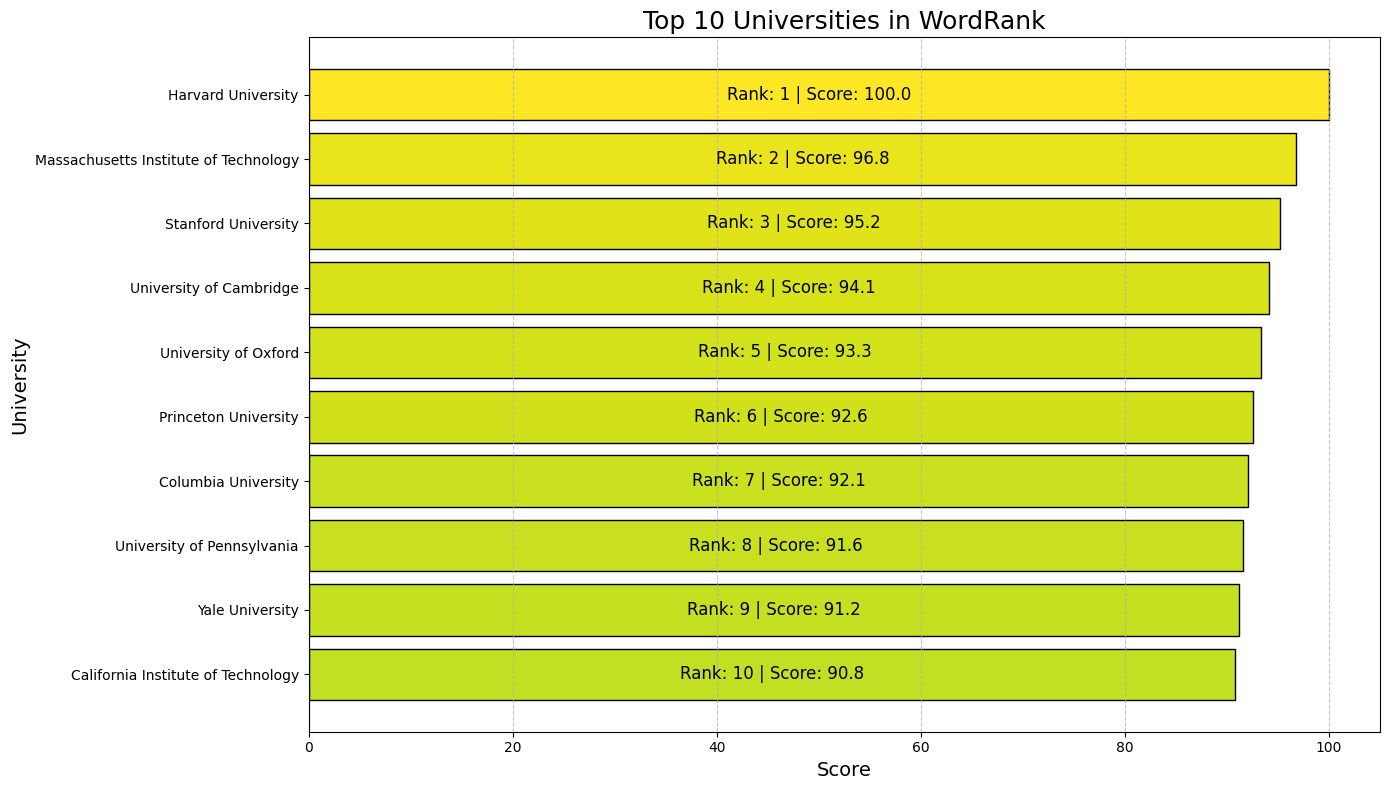

In [ ]:
top_10 = WordRankUniversity.nlargest(10, "Score")

top_10["Rank"] = range(1, len(top_10) + 1)

colors = plt.cm.viridis([score / max(top_10["Score"]) for score in top_10["Score"]])

plt.figure(figsize=(14, 8))

bars = plt.barh(top_10["Institution"], top_10["Score"], color=colors, edgecolor='black')

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, 
             f'Rank: {top_10["Rank"].iloc[i]} | Score: {width:.1f}', 
             va='center', ha='center', fontsize=12, color='black')

plt.xlabel("Score", fontsize=14)
plt.ylabel("University", fontsize=14)
plt.title("Top 10 Universities in WordRank", fontsize=18)

plt.gca().invert_yaxis()

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [289]:
TimesHigher.head(2)

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,unaccredited,disabled,female_percentage,male_percentage,rank_end_range
0,1,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,5,...,10.9,42%,49:51,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,49.0,51.0,1
1,2,Stanford University,98.0,20,99.0,1,97.8,8,99.6,2,...,6.4,23%,47:53,Stanford University,"Computer Science,Communication & Media Studies...",False,False,47.0,53.0,2


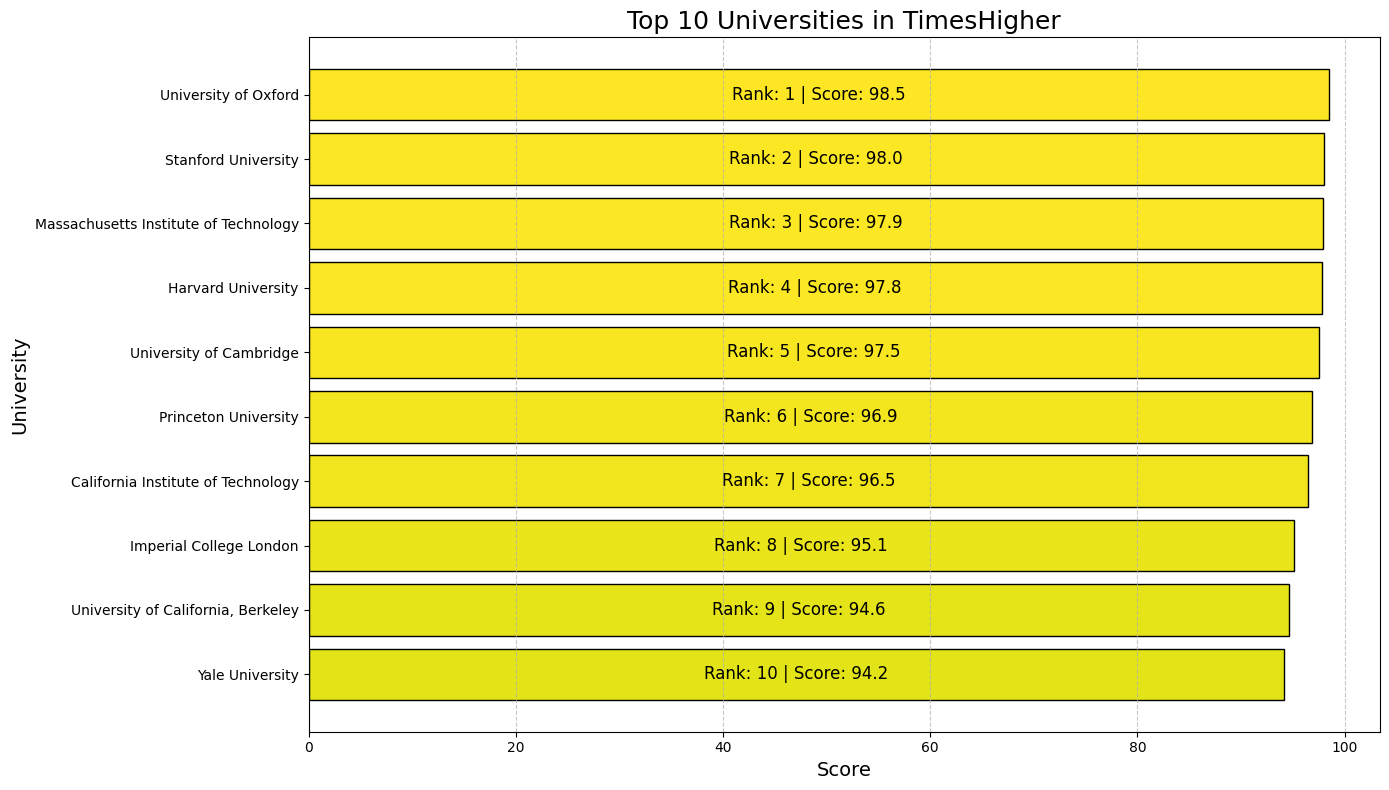

In [341]:




top_10 = TimesHigher.nlargest(10, "scores_overall")

top_10["Rank"] = range(1, len(top_10) + 1)

colors = plt.cm.viridis([score / max(top_10["scores_overall"]) for score in top_10["scores_overall"]])

plt.figure(figsize=(14, 8))

bars = plt.barh(top_10["name"], top_10["scores_overall"], color=colors, edgecolor='black')

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, 
             f'Rank: {top_10["Rank"].iloc[i]} | Score: {width:.1f}', 
             va='center', ha='center', fontsize=12, color='black')

plt.xlabel("Score", fontsize=14)
plt.ylabel("University", fontsize=14)
plt.title("Top 10 Universities in TimesHigher", fontsize=18)

plt.gca().invert_yaxis()

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


#### Q2 Which universities are ranked in the top 10 for employment outcomes?


In [314]:
WordRankUniversity.head(2)

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,100.0
1,2,Massachusetts Institute of Technology,USA,2.0,4.0,12.0,2.0,12.0,96.8


In [318]:
WordRankUniversity.sort_values('Education Rank').head(10)

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,100.0
9,10,California Institute of Technology,USA,8.0,2.0,100.0,6.0,89.0,90.8
3,4,University of Cambridge,United Kingdom,1.0,3.0,26.0,4.0,14.0,94.1
1,2,Massachusetts Institute of Technology,USA,2.0,4.0,12.0,2.0,12.0,96.8
5,6,Princeton University,USA,4.0,5.0,15.0,7.0,83.0,92.6
8,9,Yale University,USA,7.0,6.0,33.0,13.0,21.0,91.2
4,5,University of Oxford,United Kingdom,2.0,7.0,28.0,9.0,6.0,93.3
10,11,University of Chicago,USA,9.0,8.0,16.0,22.0,44.0,90.5
11,12,"University of California, Berkeley",USA,10.0,9.0,61.0,5.0,20.0,90.1
2,3,Stanford University,USA,3.0,10.0,4.0,3.0,2.0,95.2


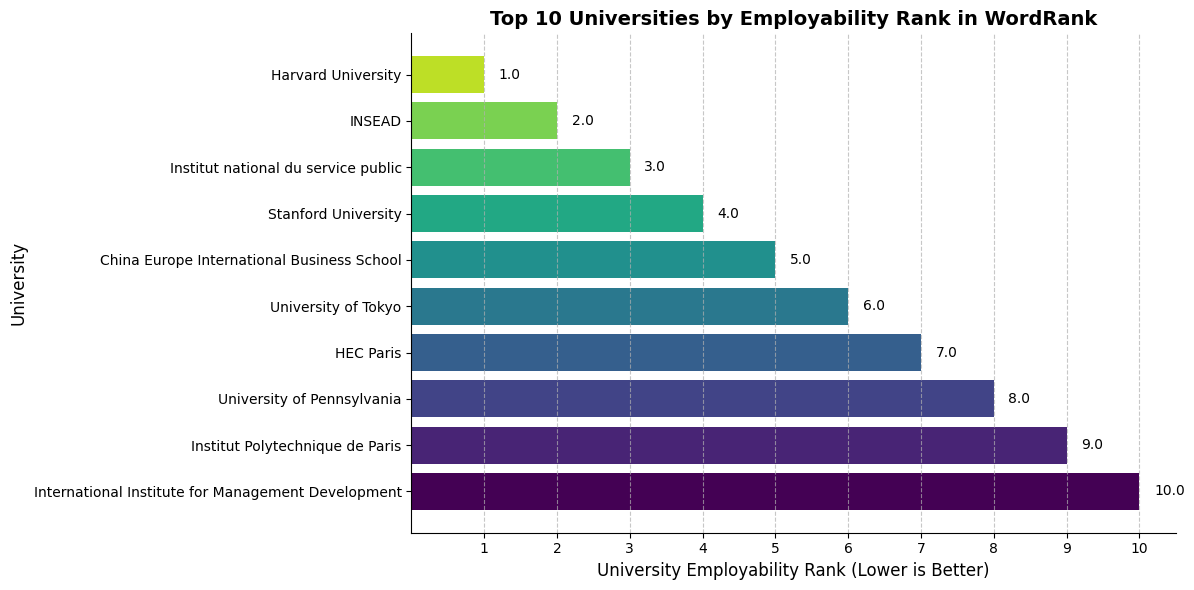

In [358]:
top_10 = WordRankUniversity.sort_values('Employability Rank').head(10)





plt.figure(figsize=(12, 6))

colors = plt.cm.viridis_r(top_10['Employability Rank'].values / top_10['Employability Rank'].max()) # Reverse viridis

plt.barh(top_10["Institution"], top_10["Employability Rank"], color=colors)

plt.xlabel("University Employability Rank (Lower is Better)", fontsize=12)  # Explicitly state "lower is better"
plt.ylabel("University", fontsize=12)
plt.title("Top 10 Universities by Employability Rank in WordRank", fontsize=14, fontweight='bold')  # Specify the ranking source

plt.gca().invert_yaxis()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(range(1, 11), fontsize=10) # Ensure ticks for all ranks
plt.yticks(fontsize=10)

for i, rank in enumerate(top_10['Employability Rank']):
    plt.text(rank + 0.2, i, str(rank), va='center', ha='left', fontsize=10) # Adjust offset as needed


plt.grid(axis="x", linestyle="--", alpha=0.7, which='both')  # Grid for all x-axis values

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#### Q What positions do universities in Saudi Arabia hold within the global rankings?

In [325]:
WordRankUniversity[WordRankUniversity['Location'] == 'Saudi Arabia'].sort_values('World Rank')

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
248,249,King Abdullah University of Science and Techno...,Saudi Arabia,1.0,551.0,1001.0,102.0,291.0,77.8
253,254,King Abdulaziz University,Saudi Arabia,2.0,551.0,1001.0,284.0,193.0,77.7
342,343,King Saud University,Saudi Arabia,3.0,551.0,357.0,284.0,320.0,76.3
614,615,King Fahd University of Petroleum and Minerals,Saudi Arabia,4.0,551.0,82.0,284.0,793.0,73.3


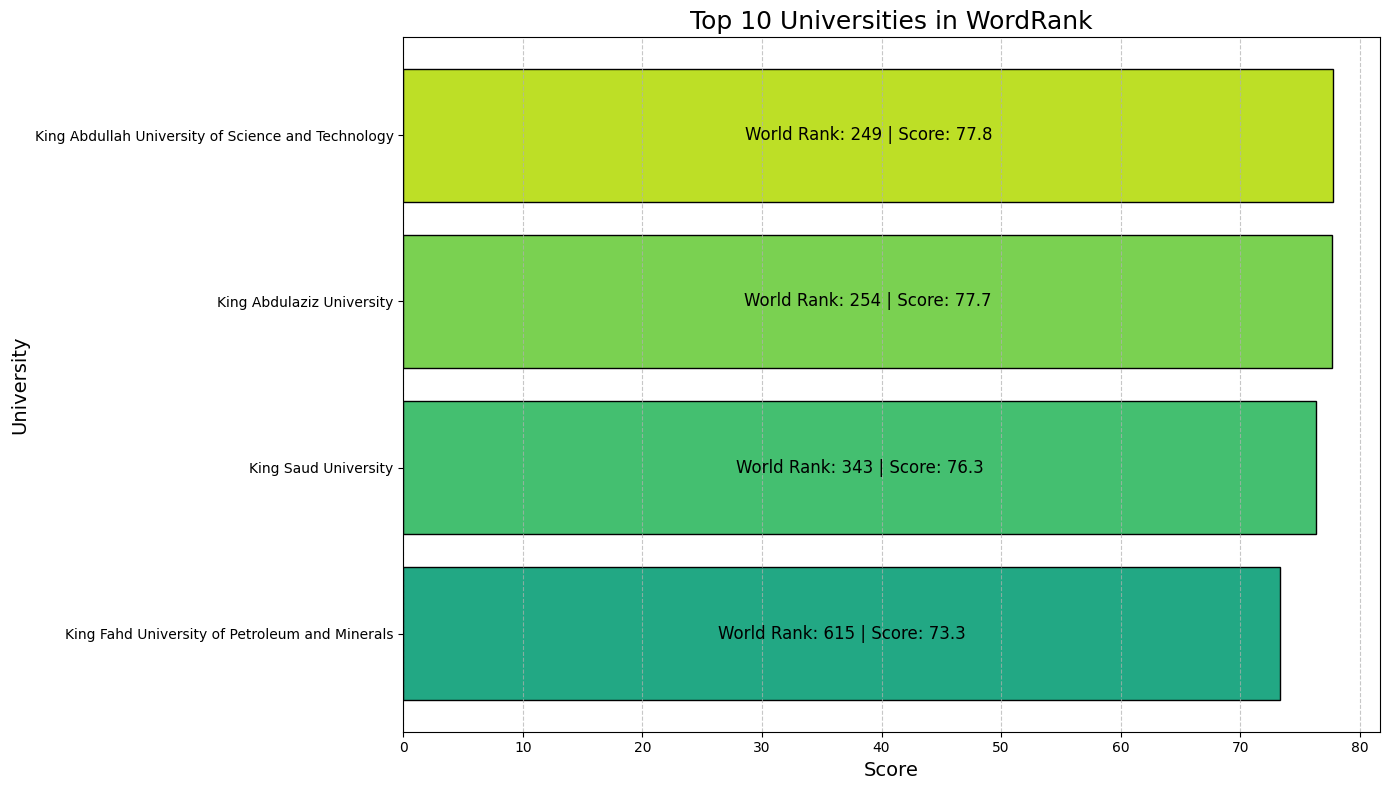

In [363]:
ksa_top = WordRankUniversity[WordRankUniversity['Location'] == 'Saudi Arabia'].sort_values('World Rank')


plt.figure(figsize=(14, 8))

bars = plt.barh(ksa_top["Institution"], ksa_top["Score"], color=colors, edgecolor='black')

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2, 
             f'World Rank: {ksa_top["World Rank"].iloc[i]} | Score: {width:.1f}', 
             va='center', ha='center', fontsize=12, color='black')

plt.xlabel("Score", fontsize=14)
plt.ylabel("University", fontsize=14)
plt.title("Top 10 Universities in WordRank", fontsize=18)

plt.gca().invert_yaxis()

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

#### Q4 Considering various factors such as employment rankings, research rankings, and others, which has the most significant impact on a university's overall ranking?

- Research rank

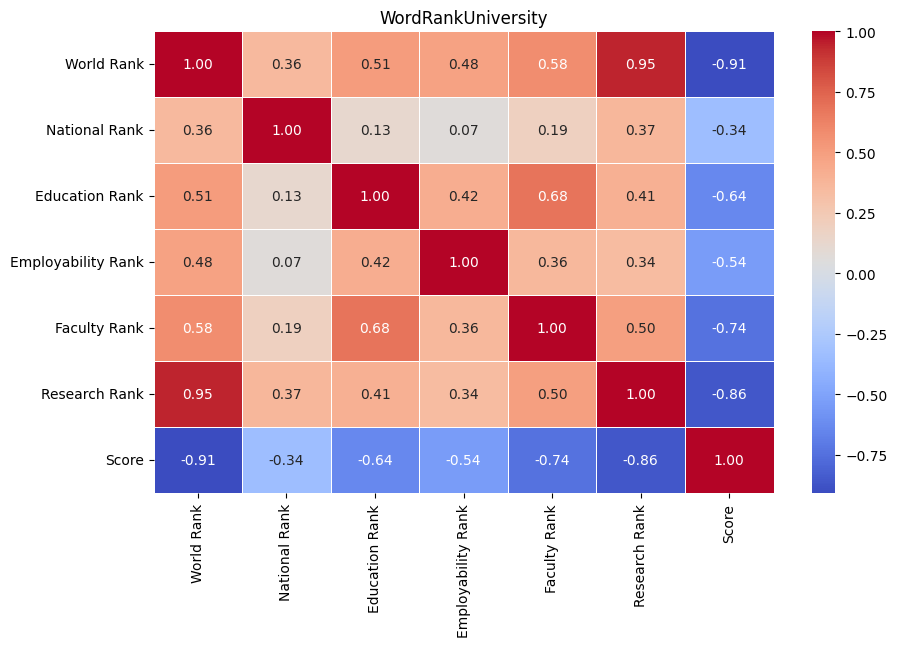

In [335]:
plt.figure(figsize=(10, 6))
sns.heatmap(WordRankUniversity.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("WordRankUniversity")
plt.show()

<Axes: xlabel='Research Rank', ylabel='World Rank'>

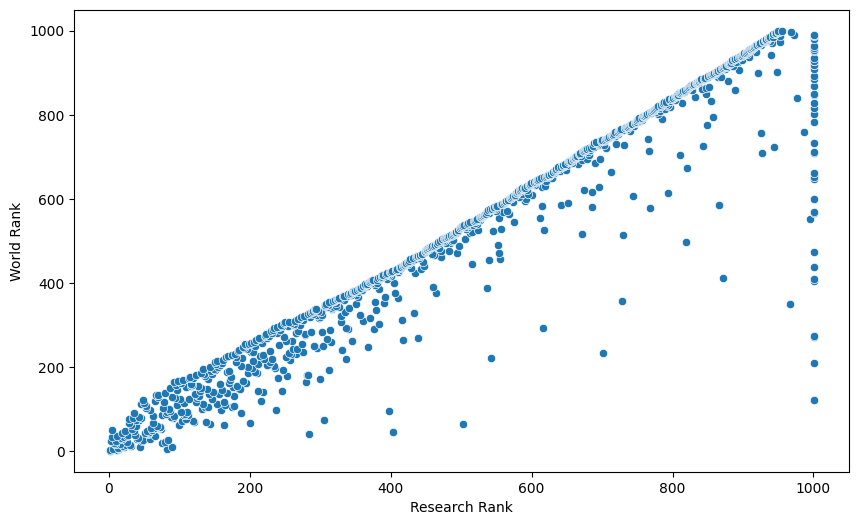

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(y='World Rank', x='Research Rank',
#hue='Race Type',
data=WordRankUniversity)


In [354]:
WordRankUniversity.head(2)

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,100.0
1,2,Massachusetts Institute of Technology,USA,2.0,4.0,12.0,2.0,12.0,96.8


<Axes: xlabel='Employability Rank', ylabel='World Rank'>

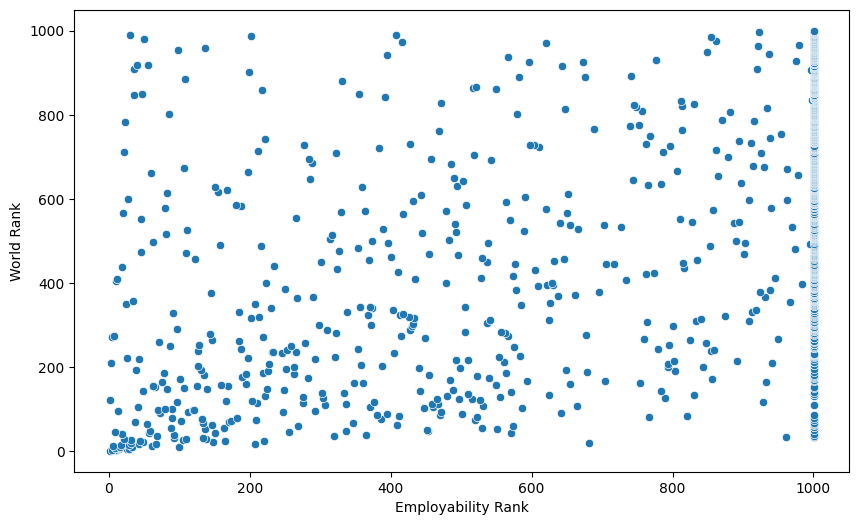

In [355]:
plt.figure(figsize=(10, 6))

sns.scatterplot(y='World Rank', x='Employability Rank',
#hue='Race Type',
data=WordRankUniversity)

<Axes: xlabel='Education Rank', ylabel='World Rank'>

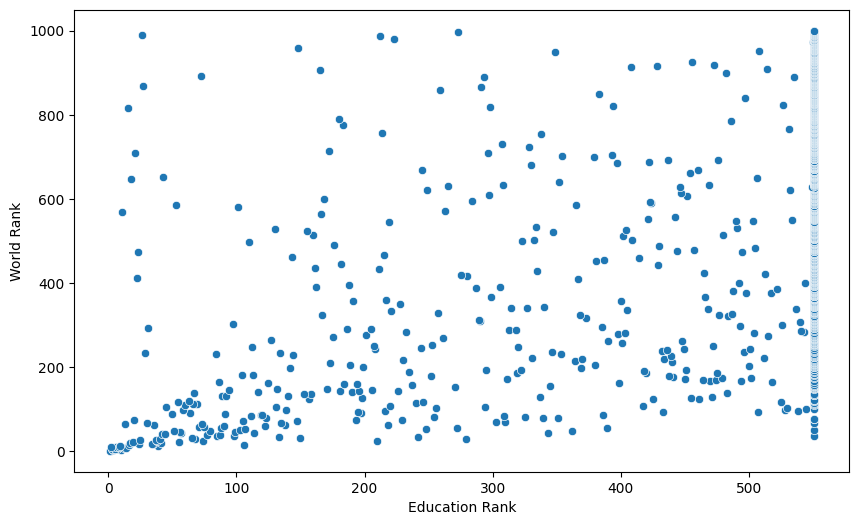

In [356]:
plt.figure(figsize=(10, 6))

sns.scatterplot(y='World Rank', x='Education Rank',
#hue='Race Type',
data=WordRankUniversity)

#### Q5 Is there a correlation between national and global university rankings, and based on this information, can you recommend a country that appears to have a high concentration of top-ranked universities?

#### addation Male and femalae percentage?

In [344]:
TimesHigher.rename(columns={'female_percentage':'male_percentage','male_percentage':'female_percentage'},inplace=True)

In [345]:
TimesHigher.head(2)

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,unaccredited,disabled,male_percentage,female_percentage,rank_end_range
0,1,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,5,...,10.9,42%,49:51,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,49.0,51.0,1
1,2,Stanford University,98.0,20,99.0,1,97.8,8,99.6,2,...,6.4,23%,47:53,Stanford University,"Computer Science,Communication & Media Studies...",False,False,47.0,53.0,2


In [ ]:
male_female = {}

for i in range(10):
    male_female = {
        
    }

AttributeError: Rectangle.set() got an unexpected keyword argument 'aspect'

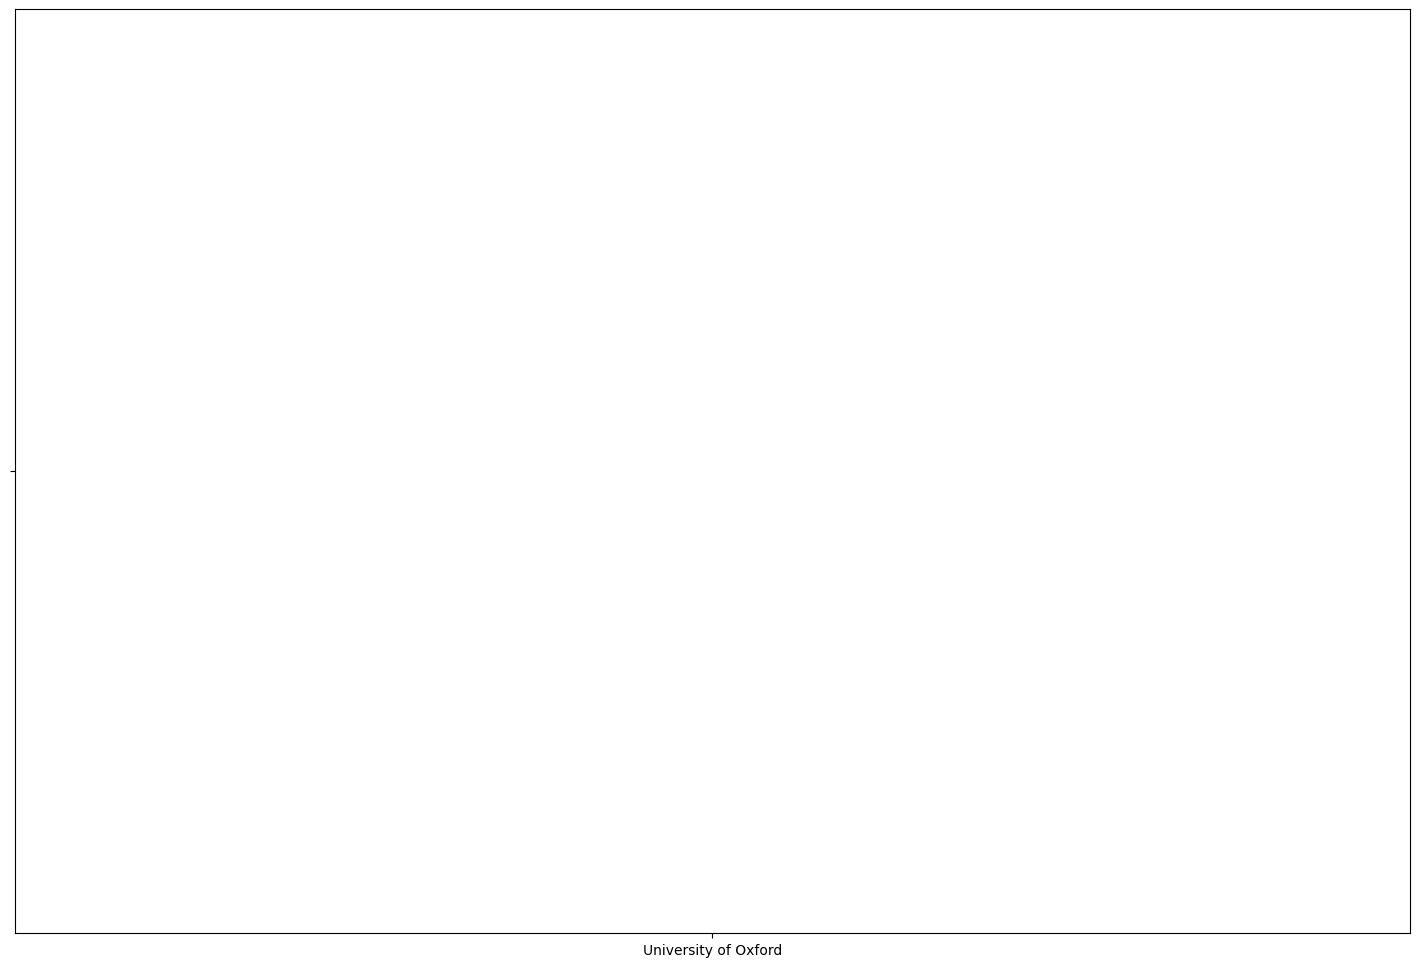

In [ ]:
sns.barplot(x="Race Type",
            y="count",
            data=TimesHigher.head(),
            palette="husl",
            hue="Race Type"
           );
plt.xticks(rotation=45);